In [299]:
# Last update: 26 November 2018
# 
# This code create True MBSE dataset
# 
# Inputs: 
# 			None
# Outputs:
#			true.csv : List of true pair of nodes, 
#					   link type and target in format: [entity_a, entity_b, relation, target]
####################################################################################################

# Load libraries
import numpy as np
import pandas as pd

# Set parameters
Dimension = 100

# Targe values
true = 1

# Big nodes
RequerimentType = 0
TestCaseType = 100
SMT = 200
ProjectType = 300

#Relation type
instanceOf = 0
verifiedBy = 1
using = 2
belongsTo = 3

def Generate_True_Graph():
	''' Function to create all true links '''

	graph = []
	for requeriment in range(RequerimentType + 1, Dimension):
	    #[requirement[1-Dimension], RequirementType0, Relation = 0]
	    graph.append([requeriment, RequerimentType, instanceOf])
	    
	    #[requirement[1-Dimension], TestCase[1-Dimension], Relation = 1]
	    graph.append([requeriment, requeriment + TestCaseType, verifiedBy])
	    
	    #[requirement[1-Dimension], Proyect[1-Dimesion], Relation = 3]
	    graph.append([requeriment, requeriment + ProjectType, belongsTo])
	    
	for testcase in range(TestCaseType + 1, TestCaseType + Dimension):
	    #[testcase[1-Dimension], TestCaseType0, Relation = 0]
	    graph.append([testcase, TestCaseType, instanceOf])
	    
	    #[testcase[1-Dimension], SM[1-Dimension], Relation = 2]
	    graph.append([testcase, testcase + (SMT - Dimension), using])
	    
	    #[testcase[1-Dimension], TestCaseType0, Relation = 3]
	    graph.append([testcase, testcase + (ProjectType - Dimension), belongsTo])
	    
	for sm in range(SMT + 1, SMT + Dimension):
	    #[sm[1-Dimension], SMT, Relation = 0]
	    graph.append([sm, SMT, instanceOf])
	    
	    #[sm[1-Dimension], Proyect[1-Dimension], Relation = 3]
	    graph.append([sm, sm + Dimension, belongsTo])

	for project in range(ProjectType + 1, ProjectType + Dimension):
	    #[project[1-Dimension], ProjectType, Relation = 0]
	    graph.append([project, ProjectType, instanceOf])

	return graph


def main():
	''' Principal function '''

	# Call for Postive and Negative graph
	positive_graph = Generate_True_Graph()

	# Transform into a pandas dataframe
	true = pd.DataFrame(positive_graph, columns=['entity_a', 'entity_b', 'relation'])
	
	# Save data
	true.to_csv('./Data/true.csv',index = False)

	return 0

if __name__ == '__main__':
    main()

In [307]:
# Last update: 26 November
# 
# Author: Shaurya Shubham
# This code load the true graph and transform
# into train, valid and to_use datasets.
#
# inputs:
# true.csv

#
# outpus:
# train.csv
# valid.csv
# to_use.csv
# edges.csv
####################################################################################

# Load libraries
import pandas as pd # To handle dataframes
from sklearn.model_selection import train_test_split # to split the datasets


def Edges_Generation(true_graph):
    ''' Function to generate edges from the true graph '''

    edges = []
    for element in true_graph.iterrows():
        edges.append([element[1]['entity_a'],element[1]['entity_b'],element[1]['relation']])

    # Saving data
    df = pd.DataFrame(edges,columns=['entity_a', 'entity_b','relation'])
    df.to_csv('./Data/edges.csv',index= False)

def Generate_Train_Valid_Use(true_graph):
    ''' Function to generate train, valid and to_use datasets '''
    
    # Randomization of true
    true_graph = true_graph.sample(frac=1).reset_index(drop = True)
    
    # print some stats
    print 'Total unique entity_a : {}'.format(len(true_graph['entity_a'].unique().tolist()))
    print 'Total unique entity_b : {}'.format(len(true_graph['entity_b'].unique().tolist()))
    print 'Total unique entities : {}'.format(len(list(set(true_graph['entity_a'].unique().tolist() + true_graph['entity_b'].unique().tolist()))))
    print 'Total unique relations : {}'.format(len(true_graph['relation'].unique().tolist()))

	# Splitting true_graph into 3 pieces: true_train, true_valid, true_to_use
    train, valid_test = train_test_split(true_graph,test_size =0.7, random_state =1) # split the data into train and (test_vaidation)
    
    # print train dataset stats to see whether we are missing any entities or not
    print 'Total unique entity_a in train dataset : {}'.format(len(train['entity_a'].unique().tolist()))
    print 'Total unique entity_b in train dataset : {}'.format(len(train['entity_b'].unique().tolist()))
    print 'Total unique entities in train dataset : {}'.format(len(list(set(train['entity_a'].unique().tolist() + train['entity_b'].unique().tolist()))))
    
    unique_train_entities =list(set(train['entity_a'].unique().tolist() + train['entity_b'].unique().tolist()))
    unique_true_graph_entities = d =list(set(true_graph['entity_a'].unique().tolist() + true_graph['entity_b'].unique().tolist()))
    missing_entities_in_train =  set(unique_true_graph_entities) -set(unique_train_entities)
    
    train_extra = valid_test[valid_test.entity_b.isin(missing_entities_in_train)] # get the missing entities from entity_b to get embedding for all entities
    train = pd.concat([train,train_extra]) # making the complete train datset with all entities
    train = train.reset_index(drop = True)
    train.to_csv('./Data/train.csv',index=False)
    
    valid_test = valid_test[~valid_test.entity_b.isin(missing_entities_in_train)] # remove the train data which we added to train dataset by using train_extra
    
    valid,test = train_test_split(valid_test,test_size =0.75, random_state =1) # split the data into valid and test(to_use)
    valid.to_csv('./Data/valid.csv',index=False)
    test.to_csv('./Data/to_use.csv',index=False)


def main():
    ''' Principal function '''
    true_graph = pd.read_csv('./Data/true.csv')
    Generate_Train_Valid_Use(true_graph)
    Edges_Generation(true_graph)
    return 0

if __name__ == '__main__':
    main()

Total unique entity_a : 396
Total unique entity_b : 301
Total unique entities : 400
Total unique relations : 4
Total unique entity_a in train dataset : 212
Total unique entity_b in train dataset : 120
Total unique entities in train dataset : 278


In [219]:
train_data = pd.read_csv('./Data/train.csv')
valid_data = pd.read_csv('./Data/valid.csv')
train_data.shape

(384, 3)

In [3]:
# Last update: 26 November 2018
# 
# Author: Shaurya Shubham
# This code train the link prediction model by using HoLE and evaluate it
# 
# Inputs:
#     edges.csv : Dataset to create negative sample
#     train.csv : Dataset to train the model
# Outputs:
#     Statistics:
#        * About trainig
#        * About validation
#        * About the use of the model
#        * About Axel format
####################################################################################################

# Loading Libraries
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.autograd import Variable
import torch.nn.functional as F
from numpy.fft import fft, ifft
import random
import itertools
import pandas as pd
import tqdm
from random import uniform

true_data = pd.read_csv('./Data/edges.csv')
Total_Entities = 400
Total_Relations = 4
Batch_Size = 2
Num_Neg_Sample = 150

# Function to create positive and negative samples
def positive(fact):

    #print fact
    entity_a, relation, entity_b = fact['entity_a'], fact['relation'], fact['entity_b']
    entity_a_id = entity_a#.view(1, -1)
    entity_b_id = entity_b#.view(1, -1)
    relation_id = relation#.view(1, -1)
    return np.array([entity_a_id,entity_b_id,relation_id])
    
def negative(triplet,num_neg_triplets=1):
    #training triplets with either the head or tail replaced by a random entity (but not both at the same time)
    # Sample until we find an invalid fact
    corrupted_triplets = []
    num_neg_count = 0
    while num_neg_count < num_neg_triplets:
        i = uniform(-1, 1)
        if i < 0:
            while True:
                entity_a = random.randint(0, Total_Entities - 1)
                #relation = random.randint(0, Total_Relations - 1)
                #entity_b = random.randint(0, Total_Entities - 1)
                rule = {'entity_a':[entity_a],'entity_b':[triplet[1]],'relation':[triplet[2]]}
                if len(list(true_data.index[true_data.isin(rule).all(1)].values)) == 0:
                    if [[entity_a,triplet[1],triplet[2]]] not in corrupted_triplets:
                        target = Variable(torch.LongTensor([0])).view(1, -1)
                        corrupted_triplets.append([entity_a,triplet[1],triplet[2]])
                        num_neg_count+=1
                        break
        if i > 0:
            while True:
                entity_b = random.randint(0, Total_Entities - 1)
                #relation = random.randint(0, Total_Relations - 1)
                #entity_b = random.randint(0, Total_Entities - 1)
                rule = {'entity_a':[triplet[0]],'entity_b':[entity_b],'relation':[triplet[2]]}
                if len(list(true_data.index[true_data.isin(rule).all(1)].values)) == 0:
                    if [[triplet[0],entity_b,triplet[2]]] not in corrupted_triplets:
                        target = Variable(torch.LongTensor([0])).view(1, -1)
                        corrupted_triplets.append([triplet[0],entity_b,triplet[2]])
                        num_neg_count+=1
                        break

    return np.array([corrupted_triplets])

In [220]:
# Custom Dataloader
class CustomDataset():
    
    def __init__(self,filepath):
        self.data = pd.read_csv(filepath, delimiter=',')
        self.data.dropna(inplace=True)
        
    def __getitem__(self,index):
        sample = {}
        sample['pos'] = positive(self.data.iloc[index])
        #sample['neg'] = negative()
        sample['neg'] = negative(sample['pos'],Num_Neg_Sample)
        return sample['pos'], sample['neg']
        
    def __len__(self):
        return (self.data.shape[0])

hole_data = CustomDataset('./Data/train.csv')
valid_hole_data = CustomDataset('./Data/valid.csv')
dataloader = DataLoader(hole_data, batch_size=Batch_Size,shuffle=False)
valid_dataloader = DataLoader(valid_hole_data, batch_size=Batch_Size,shuffle=False)

In [221]:
data_loaders = {"train": dataloader, "val": valid_dataloader}
data_lengths = {"train": train_data.shape[0], "val": valid_data.shape[0]}

In [222]:
for d in dataloader:
    print len(d)
    #print "--"
    break

2


In [261]:
## Holographic Embedding Implemetations

class TransE(nn.Module):
    
    def __init__(self,num_entity,num_rel,emb_dim):
        super(TransE,self).__init__()
        self.ent_embeddings=nn.Embedding(num_entity,emb_dim)
        self.rel_embeddings=nn.Embedding(num_rel,emb_dim)
        self.init_weights()
    
    def init_weights(self):
        nn.init.xavier_uniform_(self.ent_embeddings.weight.data)
        nn.init.xavier_uniform_(self.rel_embeddings.weight.data)
    
    def _calc(self,h,t,r):
        return torch.abs(h + r - t)
    
    
    # margin-based loss
    def loss_func(self,p_score,n_score):
        criterion = nn.MarginRankingLoss(1.)
        y = Variable(torch.Tensor([-1]))
        loss = criterion(p_score,n_score,y)
        return loss
    
    def forward(self,pos_inputs,neg_inputs):
        # [batch_size]
        pos_h = pos_inputs[:,0]
        pos_t = pos_inputs[:,1]
        pos_r = pos_inputs[:,2]
        # [batch_size,num_neg_sample]
        neg_h = neg_inputs[:,:,0]
        neg_t = neg_inputs[:,:,1]
        neg_r = neg_inputs[:,:,2]

        # [batch_size,embedding_size]
        pos_h_embed = self.ent_embeddings(pos_h)
        pos_t_embed = self.ent_embeddings(pos_t)
        pos_r_embed = self.rel_embeddings(pos_r)
        # [batch_size,num_neg_sample,embedding_size]
        neg_h_embed = self.ent_embeddings(neg_h)#.view(Batch_Size,-1,emb_dim)
        #print neg_h_embed.size()
        #print neg_h.size()
        neg_t_embed = self.ent_embeddings(neg_t)#.view(Batch_Size,-1,emb_dim)
        neg_r_embed = self.rel_embeddings(neg_r)#.view(Batch_Size,-1,emb_dim)
        pos_score = self._calc(pos_h_embed,pos_t_embed,pos_r_embed)
        neg_score = self._calc(neg_h_embed,neg_t_embed,neg_r_embed)
        #print pos_score
        #print neg_score
        #print torch.mean(pos_score,1).size()
        #print pos_score.size()
        #print neg_score.size()
        #print torch.mean(neg_score, 2).size()
        #print pos_score.size()
        pos_score = torch.sum(pos_score,1)
        #print pos_score.size()
        #print neg_score.size()
        #print torch.mean(neg_score, 1)
        neg_score = torch.sum(torch.mean(neg_score, 1),1)
        #print neg_score.size()
        #t
        #print pos_score
        #print neg_score
        #print neg_score.size()
        #print pos_score.size()
        #pos_score_mean = torch.mean(pos_score,1)
        #neg_score_mean = torch.mean(neg_score,1)
        loss = self.loss_func(pos_score,neg_score)
        return loss,pos_score.detach().numpy(),neg_score.detach().numpy()
    
    def predict(self, predict_h, predict_t, predict_r):
        pred_h = self.ent_embeddings(Variable(torch.from_numpy(predict_h)))
        pred_t = self.ent_embeddings(Variable(torch.from_numpy(predict_t)))
        pred_r = self.rel_embeddings(Variable(torch.from_numpy(predict_r)))
        p_score  = self._calc(pred_h.view(-1,emb_dim),pred_t.view(-1,emb_dim),pred_r.view(-1,emb_dim))
        p_score = torch.sum(p_score,1)
        return p_score

In [262]:
## Loading the model
num_entity = Total_Entities
num_relation = Total_Relations
emb_dim = 15

hole = TransE(num_entity,num_relation,emb_dim)


# Total number of trainable parameters
total_params = sum(p.numel() for p in hole.parameters() if p.requires_grad)
print("Total number of trainable parameters : {}" .format(total_params))

# Criterion and optimizer
#criterion = nn.BCELoss()
optimizer = torch.optim.Adam(hole.parameters(), lr=0.001)
#optimizer = torch.optim.LBFGS(hole.parameters(), lr=0.001)

# train and validation losses
train_losses = []
valid_losses = []
pos_scores_epoch=[]
neg_scores_epoch=[]

# Training of model
num_epoch = 11

Total number of trainable parameters : 6060


In [263]:
#num_epoch = 1
for epoch in range( num_epoch):
    pos_scores=[]
    neg_scores=[]
    print('Epoch {}/{}'.format(epoch+1, num_epoch- 1))
    print('-' * 10)
    for phase in ['train', 'val']:
        if phase == 'train':
            hole.train() # Set model to training mode
        else:
            hole.eval()
    
    # Each epoch has a training 
    #hole.train() # Set model to training mode
    
        running_loss = 0.0
        # Iterate over data.
        for idx,x in enumerate(data_loaders[phase]):
            pos =  x[0]
            neg = x[1]
            neg = x[1].view(Batch_Size,-1,3)
            pos = Variable(torch.LongTensor(pos))
            neg = Variable(torch.LongTensor(neg))
            #print x.size()
            loss,p_s,n_s = hole(pos,neg) # Forward pass: compute the output
            if phase=='train':
                pos_scores.append(p_s)
                neg_scores.append(n_s)
            optimizer.zero_grad() # clear gradients for next train
            loss.backward() # backpropagation, compute gradients
            optimizer.step() # apply gradients  and update the weights of hidden nodes

            running_loss += loss.data * Batch_Size

            #if phase == 'train':
            #    if (i+1) % 100 == 0 :
            #        print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f' %(epoch+1, num_epoch, i+1, data_lengths[phase]//64, loss.data))

        
        if phase == 'train':
            epoch_loss = running_loss/float(data_lengths[phase])
            print('Epoch [{}/{}]{} Loss: {:.4f}'.format(epoch+1, num_epoch,phase, epoch_loss))
            train_losses.append(epoch_loss)
            pos_scores_epoch.append(pos_scores)
            neg_scores_epoch.append(neg_scores)
        else:
            epoch_loss = running_loss/float(data_lengths[phase])
            print('Epoch [{}/{}]{} Loss: {:.4f}'.format(epoch+1, num_epoch,phase, epoch_loss))
            valid_losses.append(epoch_loss)
        #print('Epoch [{}/{}]{} Loss: {:.4f}'.format(epoch+1, num_epoch,'train', epoch_loss))


Epoch 1/10
----------
Epoch [1/11]train Loss: 0.9348
Epoch [1/11]val Loss: 0.7407
Epoch 2/10
----------
Epoch [2/11]train Loss: 0.6068
Epoch [2/11]val Loss: 0.3862
Epoch 3/10
----------
Epoch [3/11]train Loss: 0.4040
Epoch [3/11]val Loss: 0.2433
Epoch 4/10
----------
Epoch [4/11]train Loss: 0.2599
Epoch [4/11]val Loss: 0.1436
Epoch 5/10
----------
Epoch [5/11]train Loss: 0.1391
Epoch [5/11]val Loss: 0.0745
Epoch 6/10
----------
Epoch [6/11]train Loss: 0.0667
Epoch [6/11]val Loss: 0.0325
Epoch 7/10
----------
Epoch [7/11]train Loss: 0.0311
Epoch [7/11]val Loss: 0.0107
Epoch 8/10
----------
Epoch [8/11]train Loss: 0.0104
Epoch [8/11]val Loss: 0.0057
Epoch 9/10
----------
Epoch [9/11]train Loss: 0.0035
Epoch [9/11]val Loss: 0.0020
Epoch 10/10
----------
Epoch [10/11]train Loss: 0.0019
Epoch [10/11]val Loss: 0.0003
Epoch 11/10
----------
Epoch [11/11]train Loss: 0.0007
Epoch [11/11]val Loss: 0.0012


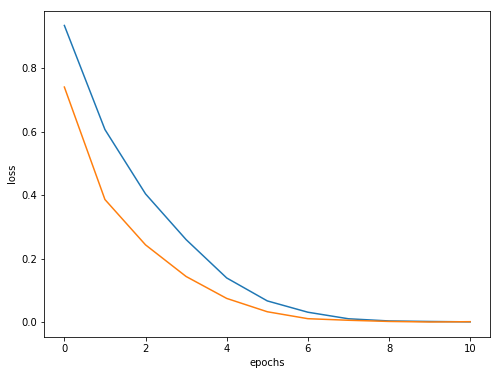

In [264]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 6),)
plt.plot(train_losses)
plt.plot(valid_losses)
plt.xlabel('epochs')
plt.ylabel('loss');

In [265]:
def save(filename,model,optimizer_):
    state = {'epoch': epoch + 1, 'state_dict': model.state_dict(),
             'optimizer': optimizer_.state_dict()}
    torch.save(state, filename)

In [266]:
save('./Data/transe_model.pth.tar',hole,optimizer)

In [271]:
np.mean(pos_scores_epoch[-1])

1.5985132

In [276]:
np.std(pos_scores_epoch[-1])*3

0.6409341841936111

In [273]:
np.mean(neg_scores_epoch[-1])

2.8846457

In [275]:
np.std(neg_scores_epoch[-1])*3

0.6596547961235046

In [270]:
pos_scores_epoch[0]

[array([5.2438183, 4.448523 ], dtype=float32),
 array([4.3042064, 3.966368 ], dtype=float32),
 array([4.6314645, 4.401272 ], dtype=float32),
 array([3.7909803, 4.731023 ], dtype=float32),
 array([5.160731 , 4.2698936], dtype=float32),
 array([5.2364006, 3.7158608], dtype=float32),
 array([4.7995024, 4.4185843], dtype=float32),
 array([4.396758, 4.081829], dtype=float32),
 array([4.4934525, 4.181781 ], dtype=float32),
 array([4.6893682, 4.2989216], dtype=float32),
 array([5.1371565, 4.4803376], dtype=float32),
 array([4.4160733, 4.3272953], dtype=float32),
 array([4.5039444, 4.165792 ], dtype=float32),
 array([5.3029847, 4.327119 ], dtype=float32),
 array([4.5255594, 3.861956 ], dtype=float32),
 array([3.623028, 4.00101 ], dtype=float32),
 array([4.1495104, 3.7844813], dtype=float32),
 array([3.5283227, 4.3333983], dtype=float32),
 array([4.1254473, 3.5319104], dtype=float32),
 array([3.9120681, 4.166987 ], dtype=float32),
 array([3.8775826, 4.1607804], dtype=float32),
 array([4.468605,

In [267]:
def give_p_score(scores):
    p =[i.sum() for i in scores]
    return sum(p)/train_data.shape[0]

In [268]:
for i in range(num_epoch):
    s = give_p_score(pos_scores_epoch[i])
    print("Epoch : {} pos_score : {}".format(i+1,s))

Epoch : 1 pos_score : 4.05059929565
Epoch : 2 pos_score : 2.64739750202
Epoch : 3 pos_score : 2.15754200704
Epoch : 4 pos_score : 1.94864999317
Epoch : 5 pos_score : 1.80251486475
Epoch : 6 pos_score : 1.69924351946
Epoch : 7 pos_score : 1.63240329176
Epoch : 8 pos_score : 1.59589192333
Epoch : 9 pos_score : 1.59499440528
Epoch : 10 pos_score : 1.59913675611
Epoch : 11 pos_score : 1.59851323503


In [269]:
for i in range(num_epoch):
    s = give_p_score(neg_scores_epoch[i])
    print("Epoch : {} neg_score : {}".format(i+1,s))

Epoch : 1 neg_score : 4.11575163777
Epoch : 2 neg_score : 3.04372922952
Epoch : 3 neg_score : 2.79857008532
Epoch : 4 neg_score : 2.77838104715
Epoch : 5 neg_score : 2.78590976695
Epoch : 6 neg_score : 2.79189156617
Epoch : 7 neg_score : 2.79978019868
Epoch : 8 neg_score : 2.8207967629
Epoch : 9 neg_score : 2.85391572863
Epoch : 10 neg_score : 2.87179476395
Epoch : 11 neg_score : 2.88464563712


In [248]:
sum(p)/train_data.shape[0]

4.009649965912104

In [229]:
# prediction function
def hole_prediction(model,fact):
    model.eval()
    i = fact['entity_a']
    j = fact['entity_b']
    score = 100000
    for k in range(4):
        #xt = [i,j,k]
        i = np.array([[i]])
        j = np.array([[j]])
        k = np.array([[k]])
        pred_score = model.predict(i,j,k)
        #print pred_score
        if score > pred_score.data:
            prediction = k
            score = pred_score.data
    return score, prediction

## Training Data Stats

train_data =  pd.read_csv('./Data/train.csv', delimiter=',')
train_data.dropna(inplace=True)
train_data['hole_prediction'] = ''
# Calculating train data stats
for idx,dat in  tqdm.tqdm_notebook(enumerate(train_data.iterrows())):
    _,train_data['hole_prediction'].iloc[idx] = hole_prediction(hole,dat[1])

acc_count = (train_data['hole_prediction'] == train_data['relation']).sum()
acc = float(acc_count)/train_data.shape[0]

# Printing results
print("\n- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - \n")
print("Total number of Green links in training dataset : {} ".format(train_data.shape[0]))
print(" Number of Green predicted correctly: {}".format(acc_count))
print(" Accuracy of Green predicted correctly: {}".format(acc))

## Validation Data Stats

valid_data =  pd.read_csv('./Data/valid.csv', delimiter=',')
valid_data.dropna(inplace=True)
valid_data['hole_prediction'] = ''
# Calculating train data stats
for idx,dat in  tqdm.tqdm_notebook(enumerate(valid_data.iterrows())):
    _,valid_data['hole_prediction'].iloc[idx] = hole_prediction(hole,dat[1])

acc_count = (valid_data['hole_prediction'] == valid_data['relation']).sum()
acc = float(acc_count)/valid_data.shape[0]

# Printing results
print("\n- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - \n")
print("Total number of Green links in training dataset : {} ".format(valid_data.shape[0]))
print(" Number of Green predicted correctly: {}".format(acc_count))
print(" Accuracy of Green predicted correctly: {}".format(acc))

## To_use Data Stats

test_data =  pd.read_csv('./Data/to_use.csv', delimiter=',')
test_data.dropna(inplace=True)
test_data['hole_prediction'] = ''
# Calculating train data stats
for idx,dat in  tqdm.tqdm_notebook(enumerate(test_data.iterrows())):
    _,test_data['hole_prediction'].iloc[idx] = hole_prediction(hole,dat[1])

acc_count = (test_data['hole_prediction'] == test_data['relation']).sum()
acc = float(acc_count)/test_data.shape[0]

# Printing results
print("\n- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - \n")
print("Total number of Green links in training dataset : {} ".format(test_data.shape[0]))
print(" Number of Green predicted correctly: {}".format(acc_count))
print(" Accuracy of Green predicted correctly: {}".format(acc))

A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
 Number of Green predicted correctly: 380
 Accuracy of Green predicted correctly: 0.989583333333


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
 Number of Green predicted correctly: 125
 Accuracy of Green predicted correctly: 0.992063492063


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
 Number of Green predicted correctly: 258
 Accuracy of Green predicted correctly: 0.677165354331


In [214]:
# prediction function
def transe_prediction2(model,fact,thres,accuracy_count = 0,green_link_accuracy_count=0,incorrect_count=0):
    model.eval()
    i = fact['entity_a']
    j = fact['entity_b']
    r = fact['relation']
    #score = 100000
    scores=[]
    for k in range(4):
        #xt = [i,j,k]
        i = np.array([[i]])
        j = np.array([[j]])
        k = np.array([[k]])
        pred_score = model.predict(i,j,k)
        #print pred_score
        scores.append(pred_score)
        if thres > pred_score.data:
            if k==r:
                accuracy_count +=1
                green_link_accuracy_count +=1
        else:
            if k!=r:
                accuracy_count +=1
            else:
                incorrect_count+=1
            score = pred_score.data
    return accuracy_count,green_link_accuracy_count,incorrect_count,scores

In [13]:
from sklearn.metrics import precision_score

In [216]:
results =[]
for thres in np.linspace(0,7,90):
    print("-------\n")
    print("Thresold value : {}").format(thres)
    ## Training Data Stats

    train_data =  pd.read_csv('./Data/train.csv', delimiter=',')
    train_data.dropna(inplace=True)
    #train_data['hole_prediction'] = ''
    # Calculating train data stats
    acc_count =0
    inacc_count=0
    green_acc_count = 0
    for idx,dat in  tqdm.tqdm_notebook(enumerate(train_data.iterrows())):
        acc_count,green_acc_count,inacc_count,_ = transe_prediction2(hole,dat[1],thres,acc_count,green_acc_count,inacc_count)

    #acc_count = (train_data['hole_prediction'] == train_data['relation']).sum()
    green_acc = float(green_acc_count)/train_data.shape[0]
    acc = float(acc_count)/(train_data.shape[0]*4)
    pre_sc = float(green_acc_count)/(green_acc_count + inacc_count)

    # Printing results
    print("\n- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - \n")
    print("Total number of Green links in training dataset : {} ".format(train_data.shape[0]))
    print("Total number of links in training dataset : {} ".format(train_data.shape[0]*4))
    print(" Number of links predicted correctly: {}".format(acc_count))
    print(" Accuracy of links predicted correctly: {}".format(acc))
    print(" Number of Green predicted correctly: {}".format(green_acc_count))
    print(" Accuracy of Green predicted correctly: {}".format(green_acc))
    print("Precision: {}".format(pre_sc))
    print ("false positive:{}".format(inacc_count))
    

    ## Validation Data Stats

    valid_data =  pd.read_csv('./Data/valid.csv', delimiter=',')
    valid_data.dropna(inplace=True)
    #valid_data['hole_prediction'] = ''
    # Calculating train data stats
    acc_count =0
    inacc_count =0
    green_acc_count = 0
    for idx,dat in  tqdm.tqdm_notebook(enumerate(valid_data.iterrows())):
        acc_count,green_acc_count,inacc_count,_ = transe_prediction2(hole,dat[1],thres,acc_count,green_acc_count,inacc_count)

    #acc_count = (valid_data['hole_prediction'] == valid_data['relation']).sum()
    green_acc = float(green_acc_count)/valid_data.shape[0]
    acc = float(acc_count)/(valid_data.shape[0]*4)
    pre_sc = float(green_acc_count)/(green_acc_count + inacc_count)

    # Printing results
    print("\n- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - \n")
    print("Total number of Green links in training dataset : {} ".format(valid_data.shape[0]))
    print("Total number of links in training dataset : {} ".format(valid_data.shape[0]*4))
    print(" Number of links predicted correctly: {}".format(acc_count))
    print(" Accuracy of links predicted correctly: {}".format(acc))
    print(" Number of Green predicted correctly: {}".format(green_acc_count))
    print(" Accuracy of Green predicted correctly: {}".format(green_acc))
    print("Precision: {}".format(pre_sc))
    print ("false positive:{}".format(inacc_count))

    ## To_use Data Stats

    test_data =  pd.read_csv('./Data/to_use.csv', delimiter=',')
    test_data.dropna(inplace=True)
    #test_data['hole_prediction'] = ''
    # Calculating train data stats
    acc_count =0
    inacc_count =0
    green_acc_count = 0
    for idx,dat in  tqdm.tqdm_notebook(enumerate(test_data.iterrows())):
        acc_count,green_acc_count,inacc_count,_ = transe_prediction2(hole,dat[1],thres,acc_count,green_acc_count,inacc_count)

    #acc_count = (test_data['hole_prediction'] == test_data['relation']).sum()
    green_acc = float(green_acc_count)/test_data.shape[0]
    acc = float(acc_count)/(test_data.shape[0]*4)
    pre_sc = float(green_acc_count)/(green_acc_count + inacc_count)

    
    # Printing results
    print("\n- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - \n")
    print("Total number of Green links in training dataset : {} ".format(test_data.shape[0]))
    print("Total number of links in training dataset : {} ".format(test_data.shape[0]*4))
    print(" Number of links predicted correctly: {}".format(acc_count))
    print(" Accuracy of links predicted correctly: {}".format(acc))
    print(" Number of Green predicted correctly: {}".format(green_acc_count))
    print(" Accuracy of Green predicted correctly: {}".format(green_acc))
    print("Precision: {}".format(pre_sc))
    print ("false positive:{}".format(inacc_count))
    results.append([thres,pre_sc])

-------

Thresold value : 0.0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 1152
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:384


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 378
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:126


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 1143
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:381
-------

Thresold value : 0.0786516853933


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 1152
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:384


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 378
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:126


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 1143
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:381
-------

Thresold value : 0.157303370787


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 1152
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:384


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 378
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:126


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 1143
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:381
-------

Thresold value : 0.23595505618


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 1152
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:384


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 378
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:126


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 1143
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:381
-------

Thresold value : 0.314606741573


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 1152
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:384


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 378
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:126


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 1143
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:381
-------

Thresold value : 0.393258426966


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 1152
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:384


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 378
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:126


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 1143
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:381
-------

Thresold value : 0.47191011236


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 1152
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:384


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 378
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:126


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 1143
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:381
-------

Thresold value : 0.550561797753


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 1152
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:384


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 378
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:126


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 1143
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:381
-------

Thresold value : 0.629213483146


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 1152
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:384


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 378
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:126


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 1143
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:381
-------

Thresold value : 0.707865168539


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 1152
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:384


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 378
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:126


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 1143
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:381
-------

Thresold value : 0.786516853933


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 1152
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:384


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 378
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:126


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 1143
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:381
-------

Thresold value : 0.865168539326


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 1152
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:384


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 378
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:126


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 1143
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:381
-------

Thresold value : 0.943820224719


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 1155
 Accuracy of links predicted correctly: 0.751953125
 Number of Green predicted correctly: 3
 Accuracy of Green predicted correctly: 0.0078125
Precision: 0.0078125
false positive:381


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 378
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:126


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 1143
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:381
-------

Thresold value : 1.02247191011


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 1158
 Accuracy of links predicted correctly: 0.75390625
 Number of Green predicted correctly: 6
 Accuracy of Green predicted correctly: 0.015625
Precision: 0.015625
false positive:378


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 378
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:126


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 1143
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:381
-------

Thresold value : 1.10112359551


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 1166
 Accuracy of links predicted correctly: 0.759114583333
 Number of Green predicted correctly: 14
 Accuracy of Green predicted correctly: 0.0364583333333
Precision: 0.0364583333333
false positive:370


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 378
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:126


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 1143
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:381
-------

Thresold value : 1.1797752809


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 1190
 Accuracy of links predicted correctly: 0.774739583333
 Number of Green predicted correctly: 38
 Accuracy of Green predicted correctly: 0.0989583333333
Precision: 0.0989583333333
false positive:346


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 378
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:126


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 1144
 Accuracy of links predicted correctly: 0.750656167979
 Number of Green predicted correctly: 1
 Accuracy of Green predicted correctly: 0.00262467191601
Precision: 0.00262467191601
false positive:380
-------

Thresold value : 1.25842696629


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 1224
 Accuracy of links predicted correctly: 0.796875
 Number of Green predicted correctly: 72
 Accuracy of Green predicted correctly: 0.1875
Precision: 0.1875
false positive:312


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 378
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:126


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 1146
 Accuracy of links predicted correctly: 0.751968503937
 Number of Green predicted correctly: 3
 Accuracy of Green predicted correctly: 0.00787401574803
Precision: 0.00787401574803
false positive:378
-------

Thresold value : 1.33707865169


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 1260
 Accuracy of links predicted correctly: 0.8203125
 Number of Green predicted correctly: 108
 Accuracy of Green predicted correctly: 0.28125
Precision: 0.28125
false positive:276


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 378
 Accuracy of links predicted correctly: 0.75
 Number of Green predicted correctly: 0
 Accuracy of Green predicted correctly: 0.0
Precision: 0.0
false positive:126


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 1148
 Accuracy of links predicted correctly: 0.753280839895
 Number of Green predicted correctly: 5
 Accuracy of Green predicted correctly: 0.0131233595801
Precision: 0.0131233595801
false positive:376
-------

Thresold value : 1.41573033708


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 1301
 Accuracy of links predicted correctly: 0.847005208333
 Number of Green predicted correctly: 149
 Accuracy of Green predicted correctly: 0.388020833333
Precision: 0.388020833333
false positive:235


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 380
 Accuracy of links predicted correctly: 0.753968253968
 Number of Green predicted correctly: 2
 Accuracy of Green predicted correctly: 0.015873015873
Precision: 0.015873015873
false positive:124


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 1155
 Accuracy of links predicted correctly: 0.757874015748
 Number of Green predicted correctly: 12
 Accuracy of Green predicted correctly: 0.0314960629921
Precision: 0.0314960629921
false positive:369
-------

Thresold value : 1.49438202247


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 1342
 Accuracy of links predicted correctly: 0.873697916667
 Number of Green predicted correctly: 190
 Accuracy of Green predicted correctly: 0.494791666667
Precision: 0.494791666667
false positive:194


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 381
 Accuracy of links predicted correctly: 0.755952380952
 Number of Green predicted correctly: 3
 Accuracy of Green predicted correctly: 0.0238095238095
Precision: 0.0238095238095
false positive:123


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 1156
 Accuracy of links predicted correctly: 0.758530183727
 Number of Green predicted correctly: 14
 Accuracy of Green predicted correctly: 0.0367454068241
Precision: 0.0367454068241
false positive:367
-------

Thresold value : 1.57303370787


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 1388
 Accuracy of links predicted correctly: 0.903645833333
 Number of Green predicted correctly: 236
 Accuracy of Green predicted correctly: 0.614583333333
Precision: 0.614583333333
false positive:148


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 381
 Accuracy of links predicted correctly: 0.755952380952
 Number of Green predicted correctly: 3
 Accuracy of Green predicted correctly: 0.0238095238095
Precision: 0.0238095238095
false positive:123


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 1165
 Accuracy of links predicted correctly: 0.764435695538
 Number of Green predicted correctly: 23
 Accuracy of Green predicted correctly: 0.0603674540682
Precision: 0.0603674540682
false positive:358
-------

Thresold value : 1.65168539326


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 1434
 Accuracy of links predicted correctly: 0.93359375
 Number of Green predicted correctly: 282
 Accuracy of Green predicted correctly: 0.734375
Precision: 0.734375
false positive:102


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 388
 Accuracy of links predicted correctly: 0.769841269841
 Number of Green predicted correctly: 10
 Accuracy of Green predicted correctly: 0.0793650793651
Precision: 0.0793650793651
false positive:116


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 1175
 Accuracy of links predicted correctly: 0.770997375328
 Number of Green predicted correctly: 33
 Accuracy of Green predicted correctly: 0.0866141732283
Precision: 0.0866141732283
false positive:348
-------

Thresold value : 1.73033707865


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 1468
 Accuracy of links predicted correctly: 0.955729166667
 Number of Green predicted correctly: 316
 Accuracy of Green predicted correctly: 0.822916666667
Precision: 0.822916666667
false positive:68


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 397
 Accuracy of links predicted correctly: 0.787698412698
 Number of Green predicted correctly: 19
 Accuracy of Green predicted correctly: 0.150793650794
Precision: 0.150793650794
false positive:107


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 1196
 Accuracy of links predicted correctly: 0.784776902887
 Number of Green predicted correctly: 55
 Accuracy of Green predicted correctly: 0.144356955381
Precision: 0.144356955381
false positive:326
-------

Thresold value : 1.80898876404


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 1501
 Accuracy of links predicted correctly: 0.977213541667
 Number of Green predicted correctly: 349
 Accuracy of Green predicted correctly: 0.908854166667
Precision: 0.908854166667
false positive:35


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 407
 Accuracy of links predicted correctly: 0.80753968254
 Number of Green predicted correctly: 29
 Accuracy of Green predicted correctly: 0.230158730159
Precision: 0.230158730159
false positive:97


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 1214
 Accuracy of links predicted correctly: 0.796587926509
 Number of Green predicted correctly: 76
 Accuracy of Green predicted correctly: 0.199475065617
Precision: 0.199475065617
false positive:305
-------

Thresold value : 1.88764044944


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 1523
 Accuracy of links predicted correctly: 0.991536458333
 Number of Green predicted correctly: 371
 Accuracy of Green predicted correctly: 0.966145833333
Precision: 0.966145833333
false positive:13


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 413
 Accuracy of links predicted correctly: 0.819444444444
 Number of Green predicted correctly: 35
 Accuracy of Green predicted correctly: 0.277777777778
Precision: 0.277777777778
false positive:91


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 1236
 Accuracy of links predicted correctly: 0.811023622047
 Number of Green predicted correctly: 100
 Accuracy of Green predicted correctly: 0.262467191601
Precision: 0.262467191601
false positive:281
-------

Thresold value : 1.96629213483


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 1528
 Accuracy of links predicted correctly: 0.994791666667
 Number of Green predicted correctly: 377
 Accuracy of Green predicted correctly: 0.981770833333
Precision: 0.981770833333
false positive:7


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 418
 Accuracy of links predicted correctly: 0.829365079365
 Number of Green predicted correctly: 41
 Accuracy of Green predicted correctly: 0.325396825397
Precision: 0.325396825397
false positive:85


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 1254
 Accuracy of links predicted correctly: 0.822834645669
 Number of Green predicted correctly: 127
 Accuracy of Green predicted correctly: 0.333333333333
Precision: 0.333333333333
false positive:254
-------

Thresold value : 2.04494382022


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 1533
 Accuracy of links predicted correctly: 0.998046875
 Number of Green predicted correctly: 382
 Accuracy of Green predicted correctly: 0.994791666667
Precision: 0.994791666667
false positive:2


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 426
 Accuracy of links predicted correctly: 0.845238095238
 Number of Green predicted correctly: 50
 Accuracy of Green predicted correctly: 0.396825396825
Precision: 0.396825396825
false positive:76


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 1272
 Accuracy of links predicted correctly: 0.834645669291
 Number of Green predicted correctly: 150
 Accuracy of Green predicted correctly: 0.393700787402
Precision: 0.393700787402
false positive:231
-------

Thresold value : 2.12359550562


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 1533
 Accuracy of links predicted correctly: 0.998046875
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 435
 Accuracy of links predicted correctly: 0.863095238095
 Number of Green predicted correctly: 60
 Accuracy of Green predicted correctly: 0.47619047619
Precision: 0.47619047619
false positive:66


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 1291
 Accuracy of links predicted correctly: 0.847112860892
 Number of Green predicted correctly: 172
 Accuracy of Green predicted correctly: 0.451443569554
Precision: 0.451443569554
false positive:209
-------

Thresold value : 2.20224719101


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 1528
 Accuracy of links predicted correctly: 0.994791666667
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 438
 Accuracy of links predicted correctly: 0.869047619048
 Number of Green predicted correctly: 67
 Accuracy of Green predicted correctly: 0.531746031746
Precision: 0.531746031746
false positive:59


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 1292
 Accuracy of links predicted correctly: 0.847769028871
 Number of Green predicted correctly: 181
 Accuracy of Green predicted correctly: 0.475065616798
Precision: 0.475065616798
false positive:200
-------

Thresold value : 2.2808988764


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 1522
 Accuracy of links predicted correctly: 0.990885416667
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 440
 Accuracy of links predicted correctly: 0.873015873016
 Number of Green predicted correctly: 71
 Accuracy of Green predicted correctly: 0.563492063492
Precision: 0.563492063492
false positive:55


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 1293
 Accuracy of links predicted correctly: 0.84842519685
 Number of Green predicted correctly: 191
 Accuracy of Green predicted correctly: 0.501312335958
Precision: 0.501312335958
false positive:190
-------

Thresold value : 2.3595505618


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 1516
 Accuracy of links predicted correctly: 0.986979166667
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 440
 Accuracy of links predicted correctly: 0.873015873016
 Number of Green predicted correctly: 75
 Accuracy of Green predicted correctly: 0.595238095238
Precision: 0.595238095238
false positive:51


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 1296
 Accuracy of links predicted correctly: 0.850393700787
 Number of Green predicted correctly: 209
 Accuracy of Green predicted correctly: 0.548556430446
Precision: 0.548556430446
false positive:172
-------

Thresold value : 2.43820224719


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 1494
 Accuracy of links predicted correctly: 0.97265625
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 438
 Accuracy of links predicted correctly: 0.869047619048
 Number of Green predicted correctly: 78
 Accuracy of Green predicted correctly: 0.619047619048
Precision: 0.619047619048
false positive:48


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 1292
 Accuracy of links predicted correctly: 0.847769028871
 Number of Green predicted correctly: 219
 Accuracy of Green predicted correctly: 0.574803149606
Precision: 0.574803149606
false positive:162
-------

Thresold value : 2.51685393258


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 1475
 Accuracy of links predicted correctly: 0.960286458333
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 426
 Accuracy of links predicted correctly: 0.845238095238
 Number of Green predicted correctly: 80
 Accuracy of Green predicted correctly: 0.634920634921
Precision: 0.634920634921
false positive:46


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 1275
 Accuracy of links predicted correctly: 0.836614173228
 Number of Green predicted correctly: 227
 Accuracy of Green predicted correctly: 0.595800524934
Precision: 0.595800524934
false positive:154
-------

Thresold value : 2.59550561798


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 1435
 Accuracy of links predicted correctly: 0.934244791667
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 421
 Accuracy of links predicted correctly: 0.835317460317
 Number of Green predicted correctly: 82
 Accuracy of Green predicted correctly: 0.650793650794
Precision: 0.650793650794
false positive:44


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 1250
 Accuracy of links predicted correctly: 0.820209973753
 Number of Green predicted correctly: 236
 Accuracy of Green predicted correctly: 0.619422572178
Precision: 0.619422572178
false positive:145
-------

Thresold value : 2.67415730337


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 1390
 Accuracy of links predicted correctly: 0.904947916667
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 416
 Accuracy of links predicted correctly: 0.825396825397
 Number of Green predicted correctly: 87
 Accuracy of Green predicted correctly: 0.690476190476
Precision: 0.690476190476
false positive:39


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 1224
 Accuracy of links predicted correctly: 0.803149606299
 Number of Green predicted correctly: 247
 Accuracy of Green predicted correctly: 0.648293963255
Precision: 0.648293963255
false positive:134
-------

Thresold value : 2.75280898876


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 1327
 Accuracy of links predicted correctly: 0.863932291667
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 403
 Accuracy of links predicted correctly: 0.799603174603
 Number of Green predicted correctly: 89
 Accuracy of Green predicted correctly: 0.706349206349
Precision: 0.706349206349
false positive:37


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 1191
 Accuracy of links predicted correctly: 0.781496062992
 Number of Green predicted correctly: 259
 Accuracy of Green predicted correctly: 0.679790026247
Precision: 0.679790026247
false positive:122
-------

Thresold value : 2.83146067416


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 1273
 Accuracy of links predicted correctly: 0.828776041667
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 395
 Accuracy of links predicted correctly: 0.78373015873
 Number of Green predicted correctly: 91
 Accuracy of Green predicted correctly: 0.722222222222
Precision: 0.722222222222
false positive:35


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 1165
 Accuracy of links predicted correctly: 0.764435695538
 Number of Green predicted correctly: 268
 Accuracy of Green predicted correctly: 0.703412073491
Precision: 0.703412073491
false positive:113
-------

Thresold value : 2.91011235955


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 1211
 Accuracy of links predicted correctly: 0.788411458333
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 377
 Accuracy of links predicted correctly: 0.748015873016
 Number of Green predicted correctly: 92
 Accuracy of Green predicted correctly: 0.730158730159
Precision: 0.730158730159
false positive:34


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 1126
 Accuracy of links predicted correctly: 0.738845144357
 Number of Green predicted correctly: 274
 Accuracy of Green predicted correctly: 0.719160104987
Precision: 0.719160104987
false positive:107
-------

Thresold value : 2.98876404494


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 1134
 Accuracy of links predicted correctly: 0.73828125
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 360
 Accuracy of links predicted correctly: 0.714285714286
 Number of Green predicted correctly: 93
 Accuracy of Green predicted correctly: 0.738095238095
Precision: 0.738095238095
false positive:33


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 1079
 Accuracy of links predicted correctly: 0.708005249344
 Number of Green predicted correctly: 280
 Accuracy of Green predicted correctly: 0.734908136483
Precision: 0.734908136483
false positive:101
-------

Thresold value : 3.06741573034


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 1067
 Accuracy of links predicted correctly: 0.694661458333
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 339
 Accuracy of links predicted correctly: 0.672619047619
 Number of Green predicted correctly: 94
 Accuracy of Green predicted correctly: 0.746031746032
Precision: 0.746031746032
false positive:32


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 1018
 Accuracy of links predicted correctly: 0.667979002625
 Number of Green predicted correctly: 291
 Accuracy of Green predicted correctly: 0.763779527559
Precision: 0.763779527559
false positive:90
-------

Thresold value : 3.14606741573


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 989
 Accuracy of links predicted correctly: 0.643880208333
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 321
 Accuracy of links predicted correctly: 0.636904761905
 Number of Green predicted correctly: 95
 Accuracy of Green predicted correctly: 0.753968253968
Precision: 0.753968253968
false positive:31


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 962
 Accuracy of links predicted correctly: 0.631233595801
 Number of Green predicted correctly: 295
 Accuracy of Green predicted correctly: 0.774278215223
Precision: 0.774278215223
false positive:86
-------

Thresold value : 3.22471910112


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 920
 Accuracy of links predicted correctly: 0.598958333333
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 303
 Accuracy of links predicted correctly: 0.60119047619
 Number of Green predicted correctly: 95
 Accuracy of Green predicted correctly: 0.753968253968
Precision: 0.753968253968
false positive:31


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 911
 Accuracy of links predicted correctly: 0.597769028871
 Number of Green predicted correctly: 299
 Accuracy of Green predicted correctly: 0.784776902887
Precision: 0.784776902887
false positive:82
-------

Thresold value : 3.30337078652


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 869
 Accuracy of links predicted correctly: 0.565755208333
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 281
 Accuracy of links predicted correctly: 0.55753968254
 Number of Green predicted correctly: 96
 Accuracy of Green predicted correctly: 0.761904761905
Precision: 0.761904761905
false positive:30


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 857
 Accuracy of links predicted correctly: 0.562335958005
 Number of Green predicted correctly: 306
 Accuracy of Green predicted correctly: 0.803149606299
Precision: 0.803149606299
false positive:75
-------

Thresold value : 3.38202247191


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 795
 Accuracy of links predicted correctly: 0.517578125
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 259
 Accuracy of links predicted correctly: 0.513888888889
 Number of Green predicted correctly: 98
 Accuracy of Green predicted correctly: 0.777777777778
Precision: 0.777777777778
false positive:28


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 806
 Accuracy of links predicted correctly: 0.528871391076
 Number of Green predicted correctly: 307
 Accuracy of Green predicted correctly: 0.805774278215
Precision: 0.805774278215
false positive:74
-------

Thresold value : 3.4606741573


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 740
 Accuracy of links predicted correctly: 0.481770833333
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 250
 Accuracy of links predicted correctly: 0.496031746032
 Number of Green predicted correctly: 99
 Accuracy of Green predicted correctly: 0.785714285714
Precision: 0.785714285714
false positive:27


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 762
 Accuracy of links predicted correctly: 0.5
 Number of Green predicted correctly: 310
 Accuracy of Green predicted correctly: 0.813648293963
Precision: 0.813648293963
false positive:71
-------

Thresold value : 3.5393258427


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 666
 Accuracy of links predicted correctly: 0.43359375
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 244
 Accuracy of links predicted correctly: 0.484126984127
 Number of Green predicted correctly: 100
 Accuracy of Green predicted correctly: 0.793650793651
Precision: 0.793650793651
false positive:26


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 726
 Accuracy of links predicted correctly: 0.476377952756
 Number of Green predicted correctly: 314
 Accuracy of Green predicted correctly: 0.824146981627
Precision: 0.824146981627
false positive:67
-------

Thresold value : 3.61797752809


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 617
 Accuracy of links predicted correctly: 0.401692708333
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 233
 Accuracy of links predicted correctly: 0.462301587302
 Number of Green predicted correctly: 101
 Accuracy of Green predicted correctly: 0.801587301587
Precision: 0.801587301587
false positive:25


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 689
 Accuracy of links predicted correctly: 0.452099737533
 Number of Green predicted correctly: 318
 Accuracy of Green predicted correctly: 0.834645669291
Precision: 0.834645669291
false positive:63
-------

Thresold value : 3.69662921348


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 576
 Accuracy of links predicted correctly: 0.375
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 225
 Accuracy of links predicted correctly: 0.446428571429
 Number of Green predicted correctly: 103
 Accuracy of Green predicted correctly: 0.81746031746
Precision: 0.81746031746
false positive:23


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 658
 Accuracy of links predicted correctly: 0.431758530184
 Number of Green predicted correctly: 321
 Accuracy of Green predicted correctly: 0.842519685039
Precision: 0.842519685039
false positive:60
-------

Thresold value : 3.77528089888


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 540
 Accuracy of links predicted correctly: 0.3515625
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 216
 Accuracy of links predicted correctly: 0.428571428571
 Number of Green predicted correctly: 104
 Accuracy of Green predicted correctly: 0.825396825397
Precision: 0.825396825397
false positive:22


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 633
 Accuracy of links predicted correctly: 0.415354330709
 Number of Green predicted correctly: 325
 Accuracy of Green predicted correctly: 0.853018372703
Precision: 0.853018372703
false positive:56
-------

Thresold value : 3.85393258427


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 515
 Accuracy of links predicted correctly: 0.335286458333
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 204
 Accuracy of links predicted correctly: 0.404761904762
 Number of Green predicted correctly: 104
 Accuracy of Green predicted correctly: 0.825396825397
Precision: 0.825396825397
false positive:22


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 613
 Accuracy of links predicted correctly: 0.402230971129
 Number of Green predicted correctly: 329
 Accuracy of Green predicted correctly: 0.863517060367
Precision: 0.863517060367
false positive:52
-------

Thresold value : 3.93258426966


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 485
 Accuracy of links predicted correctly: 0.315755208333
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 198
 Accuracy of links predicted correctly: 0.392857142857
 Number of Green predicted correctly: 104
 Accuracy of Green predicted correctly: 0.825396825397
Precision: 0.825396825397
false positive:22


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 591
 Accuracy of links predicted correctly: 0.387795275591
 Number of Green predicted correctly: 329
 Accuracy of Green predicted correctly: 0.863517060367
Precision: 0.863517060367
false positive:52
-------

Thresold value : 4.01123595506


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 458
 Accuracy of links predicted correctly: 0.298177083333
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 193
 Accuracy of links predicted correctly: 0.382936507937
 Number of Green predicted correctly: 105
 Accuracy of Green predicted correctly: 0.833333333333
Precision: 0.833333333333
false positive:21


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 565
 Accuracy of links predicted correctly: 0.370734908136
 Number of Green predicted correctly: 330
 Accuracy of Green predicted correctly: 0.866141732283
Precision: 0.866141732283
false positive:51
-------

Thresold value : 4.08988764045


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 429
 Accuracy of links predicted correctly: 0.279296875
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 193
 Accuracy of links predicted correctly: 0.382936507937
 Number of Green predicted correctly: 106
 Accuracy of Green predicted correctly: 0.84126984127
Precision: 0.84126984127
false positive:20


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 545
 Accuracy of links predicted correctly: 0.357611548556
 Number of Green predicted correctly: 330
 Accuracy of Green predicted correctly: 0.866141732283
Precision: 0.866141732283
false positive:51
-------

Thresold value : 4.16853932584


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 412
 Accuracy of links predicted correctly: 0.268229166667
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 184
 Accuracy of links predicted correctly: 0.365079365079
 Number of Green predicted correctly: 107
 Accuracy of Green predicted correctly: 0.849206349206
Precision: 0.849206349206
false positive:19


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 532
 Accuracy of links predicted correctly: 0.349081364829
 Number of Green predicted correctly: 334
 Accuracy of Green predicted correctly: 0.876640419948
Precision: 0.876640419948
false positive:47
-------

Thresold value : 4.24719101124


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 401
 Accuracy of links predicted correctly: 0.261067708333
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 180
 Accuracy of links predicted correctly: 0.357142857143
 Number of Green predicted correctly: 107
 Accuracy of Green predicted correctly: 0.849206349206
Precision: 0.849206349206
false positive:19


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 525
 Accuracy of links predicted correctly: 0.344488188976
 Number of Green predicted correctly: 334
 Accuracy of Green predicted correctly: 0.876640419948
Precision: 0.876640419948
false positive:47
-------

Thresold value : 4.32584269663


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 393
 Accuracy of links predicted correctly: 0.255859375
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 176
 Accuracy of links predicted correctly: 0.349206349206
 Number of Green predicted correctly: 109
 Accuracy of Green predicted correctly: 0.865079365079
Precision: 0.865079365079
false positive:17


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 513
 Accuracy of links predicted correctly: 0.336614173228
 Number of Green predicted correctly: 334
 Accuracy of Green predicted correctly: 0.876640419948
Precision: 0.876640419948
false positive:47
-------

Thresold value : 4.40449438202


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 391
 Accuracy of links predicted correctly: 0.254557291667
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 176
 Accuracy of links predicted correctly: 0.349206349206
 Number of Green predicted correctly: 109
 Accuracy of Green predicted correctly: 0.865079365079
Precision: 0.865079365079
false positive:17


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 507
 Accuracy of links predicted correctly: 0.332677165354
 Number of Green predicted correctly: 335
 Accuracy of Green predicted correctly: 0.879265091864
Precision: 0.879265091864
false positive:46
-------

Thresold value : 4.48314606742


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 390
 Accuracy of links predicted correctly: 0.25390625
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 173
 Accuracy of links predicted correctly: 0.343253968254
 Number of Green predicted correctly: 109
 Accuracy of Green predicted correctly: 0.865079365079
Precision: 0.865079365079
false positive:17


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 496
 Accuracy of links predicted correctly: 0.325459317585
 Number of Green predicted correctly: 335
 Accuracy of Green predicted correctly: 0.879265091864
Precision: 0.879265091864
false positive:46
-------

Thresold value : 4.56179775281


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 387
 Accuracy of links predicted correctly: 0.251953125
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 170
 Accuracy of links predicted correctly: 0.337301587302
 Number of Green predicted correctly: 109
 Accuracy of Green predicted correctly: 0.865079365079
Precision: 0.865079365079
false positive:17


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 490
 Accuracy of links predicted correctly: 0.321522309711
 Number of Green predicted correctly: 335
 Accuracy of Green predicted correctly: 0.879265091864
Precision: 0.879265091864
false positive:46
-------

Thresold value : 4.6404494382


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 385
 Accuracy of links predicted correctly: 0.250651041667
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 166
 Accuracy of links predicted correctly: 0.329365079365
 Number of Green predicted correctly: 109
 Accuracy of Green predicted correctly: 0.865079365079
Precision: 0.865079365079
false positive:17


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 481
 Accuracy of links predicted correctly: 0.3156167979
 Number of Green predicted correctly: 335
 Accuracy of Green predicted correctly: 0.879265091864
Precision: 0.879265091864
false positive:46
-------

Thresold value : 4.7191011236


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 385
 Accuracy of links predicted correctly: 0.250651041667
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 166
 Accuracy of links predicted correctly: 0.329365079365
 Number of Green predicted correctly: 110
 Accuracy of Green predicted correctly: 0.873015873016
Precision: 0.873015873016
false positive:16


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 477
 Accuracy of links predicted correctly: 0.312992125984
 Number of Green predicted correctly: 335
 Accuracy of Green predicted correctly: 0.879265091864
Precision: 0.879265091864
false positive:46
-------

Thresold value : 4.79775280899


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 385
 Accuracy of links predicted correctly: 0.250651041667
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 166
 Accuracy of links predicted correctly: 0.329365079365
 Number of Green predicted correctly: 110
 Accuracy of Green predicted correctly: 0.873015873016
Precision: 0.873015873016
false positive:16


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 474
 Accuracy of links predicted correctly: 0.311023622047
 Number of Green predicted correctly: 335
 Accuracy of Green predicted correctly: 0.879265091864
Precision: 0.879265091864
false positive:46
-------

Thresold value : 4.87640449438


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 384
 Accuracy of links predicted correctly: 0.25
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 167
 Accuracy of links predicted correctly: 0.331349206349
 Number of Green predicted correctly: 111
 Accuracy of Green predicted correctly: 0.880952380952
Precision: 0.880952380952
false positive:15


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 473
 Accuracy of links predicted correctly: 0.310367454068
 Number of Green predicted correctly: 335
 Accuracy of Green predicted correctly: 0.879265091864
Precision: 0.879265091864
false positive:46
-------

Thresold value : 4.95505617978


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 384
 Accuracy of links predicted correctly: 0.25
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 165
 Accuracy of links predicted correctly: 0.327380952381
 Number of Green predicted correctly: 111
 Accuracy of Green predicted correctly: 0.880952380952
Precision: 0.880952380952
false positive:15


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 471
 Accuracy of links predicted correctly: 0.30905511811
 Number of Green predicted correctly: 336
 Accuracy of Green predicted correctly: 0.88188976378
Precision: 0.88188976378
false positive:45
-------

Thresold value : 5.03370786517


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 384
 Accuracy of links predicted correctly: 0.25
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 161
 Accuracy of links predicted correctly: 0.319444444444
 Number of Green predicted correctly: 111
 Accuracy of Green predicted correctly: 0.880952380952
Precision: 0.880952380952
false positive:15


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 470
 Accuracy of links predicted correctly: 0.308398950131
 Number of Green predicted correctly: 336
 Accuracy of Green predicted correctly: 0.88188976378
Precision: 0.88188976378
false positive:45
-------

Thresold value : 5.11235955056


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 384
 Accuracy of links predicted correctly: 0.25
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 161
 Accuracy of links predicted correctly: 0.319444444444
 Number of Green predicted correctly: 112
 Accuracy of Green predicted correctly: 0.888888888889
Precision: 0.888888888889
false positive:14


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 468
 Accuracy of links predicted correctly: 0.307086614173
 Number of Green predicted correctly: 336
 Accuracy of Green predicted correctly: 0.88188976378
Precision: 0.88188976378
false positive:45
-------

Thresold value : 5.19101123596


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 384
 Accuracy of links predicted correctly: 0.25
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 161
 Accuracy of links predicted correctly: 0.319444444444
 Number of Green predicted correctly: 112
 Accuracy of Green predicted correctly: 0.888888888889
Precision: 0.888888888889
false positive:14


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 469
 Accuracy of links predicted correctly: 0.307742782152
 Number of Green predicted correctly: 340
 Accuracy of Green predicted correctly: 0.892388451444
Precision: 0.892388451444
false positive:41
-------

Thresold value : 5.26966292135


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 384
 Accuracy of links predicted correctly: 0.25
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 161
 Accuracy of links predicted correctly: 0.319444444444
 Number of Green predicted correctly: 112
 Accuracy of Green predicted correctly: 0.888888888889
Precision: 0.888888888889
false positive:14


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 469
 Accuracy of links predicted correctly: 0.307742782152
 Number of Green predicted correctly: 342
 Accuracy of Green predicted correctly: 0.897637795276
Precision: 0.897637795276
false positive:39
-------

Thresold value : 5.34831460674


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 384
 Accuracy of links predicted correctly: 0.25
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 161
 Accuracy of links predicted correctly: 0.319444444444
 Number of Green predicted correctly: 112
 Accuracy of Green predicted correctly: 0.888888888889
Precision: 0.888888888889
false positive:14


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 467
 Accuracy of links predicted correctly: 0.306430446194
 Number of Green predicted correctly: 343
 Accuracy of Green predicted correctly: 0.900262467192
Precision: 0.900262467192
false positive:38
-------

Thresold value : 5.42696629213


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 384
 Accuracy of links predicted correctly: 0.25
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 158
 Accuracy of links predicted correctly: 0.313492063492
 Number of Green predicted correctly: 112
 Accuracy of Green predicted correctly: 0.888888888889
Precision: 0.888888888889
false positive:14


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 465
 Accuracy of links predicted correctly: 0.305118110236
 Number of Green predicted correctly: 345
 Accuracy of Green predicted correctly: 0.905511811024
Precision: 0.905511811024
false positive:36
-------

Thresold value : 5.50561797753


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 384
 Accuracy of links predicted correctly: 0.25
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 155
 Accuracy of links predicted correctly: 0.30753968254
 Number of Green predicted correctly: 112
 Accuracy of Green predicted correctly: 0.888888888889
Precision: 0.888888888889
false positive:14


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 463
 Accuracy of links predicted correctly: 0.303805774278
 Number of Green predicted correctly: 345
 Accuracy of Green predicted correctly: 0.905511811024
Precision: 0.905511811024
false positive:36
-------

Thresold value : 5.58426966292


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 384
 Accuracy of links predicted correctly: 0.25
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 153
 Accuracy of links predicted correctly: 0.303571428571
 Number of Green predicted correctly: 113
 Accuracy of Green predicted correctly: 0.896825396825
Precision: 0.896825396825
false positive:13


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 461
 Accuracy of links predicted correctly: 0.30249343832
 Number of Green predicted correctly: 346
 Accuracy of Green predicted correctly: 0.90813648294
Precision: 0.90813648294
false positive:35
-------

Thresold value : 5.66292134831


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 384
 Accuracy of links predicted correctly: 0.25
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 152
 Accuracy of links predicted correctly: 0.301587301587
 Number of Green predicted correctly: 113
 Accuracy of Green predicted correctly: 0.896825396825
Precision: 0.896825396825
false positive:13


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 457
 Accuracy of links predicted correctly: 0.299868766404
 Number of Green predicted correctly: 347
 Accuracy of Green predicted correctly: 0.910761154856
Precision: 0.910761154856
false positive:34
-------

Thresold value : 5.74157303371


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 384
 Accuracy of links predicted correctly: 0.25
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 152
 Accuracy of links predicted correctly: 0.301587301587
 Number of Green predicted correctly: 113
 Accuracy of Green predicted correctly: 0.896825396825
Precision: 0.896825396825
false positive:13


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 458
 Accuracy of links predicted correctly: 0.300524934383
 Number of Green predicted correctly: 349
 Accuracy of Green predicted correctly: 0.916010498688
Precision: 0.916010498688
false positive:32
-------

Thresold value : 5.8202247191


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 384
 Accuracy of links predicted correctly: 0.25
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 151
 Accuracy of links predicted correctly: 0.299603174603
 Number of Green predicted correctly: 113
 Accuracy of Green predicted correctly: 0.896825396825
Precision: 0.896825396825
false positive:13


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 455
 Accuracy of links predicted correctly: 0.298556430446
 Number of Green predicted correctly: 349
 Accuracy of Green predicted correctly: 0.916010498688
Precision: 0.916010498688
false positive:32
-------

Thresold value : 5.89887640449


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 384
 Accuracy of links predicted correctly: 0.25
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 149
 Accuracy of links predicted correctly: 0.295634920635
 Number of Green predicted correctly: 114
 Accuracy of Green predicted correctly: 0.904761904762
Precision: 0.904761904762
false positive:12


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 452
 Accuracy of links predicted correctly: 0.296587926509
 Number of Green predicted correctly: 351
 Accuracy of Green predicted correctly: 0.92125984252
Precision: 0.92125984252
false positive:30
-------

Thresold value : 5.97752808989


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 384
 Accuracy of links predicted correctly: 0.25
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 147
 Accuracy of links predicted correctly: 0.291666666667
 Number of Green predicted correctly: 114
 Accuracy of Green predicted correctly: 0.904761904762
Precision: 0.904761904762
false positive:12


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 452
 Accuracy of links predicted correctly: 0.296587926509
 Number of Green predicted correctly: 356
 Accuracy of Green predicted correctly: 0.9343832021
Precision: 0.9343832021
false positive:25
-------

Thresold value : 6.05617977528


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 384
 Accuracy of links predicted correctly: 0.25
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 147
 Accuracy of links predicted correctly: 0.291666666667
 Number of Green predicted correctly: 116
 Accuracy of Green predicted correctly: 0.920634920635
Precision: 0.920634920635
false positive:10


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 451
 Accuracy of links predicted correctly: 0.29593175853
 Number of Green predicted correctly: 358
 Accuracy of Green predicted correctly: 0.939632545932
Precision: 0.939632545932
false positive:23
-------

Thresold value : 6.13483146067


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 384
 Accuracy of links predicted correctly: 0.25
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 144
 Accuracy of links predicted correctly: 0.285714285714
 Number of Green predicted correctly: 117
 Accuracy of Green predicted correctly: 0.928571428571
Precision: 0.928571428571
false positive:9


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 453
 Accuracy of links predicted correctly: 0.297244094488
 Number of Green predicted correctly: 360
 Accuracy of Green predicted correctly: 0.944881889764
Precision: 0.944881889764
false positive:21
-------

Thresold value : 6.21348314607


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 384
 Accuracy of links predicted correctly: 0.25
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 143
 Accuracy of links predicted correctly: 0.28373015873
 Number of Green predicted correctly: 118
 Accuracy of Green predicted correctly: 0.936507936508
Precision: 0.936507936508
false positive:8


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 446
 Accuracy of links predicted correctly: 0.292650918635
 Number of Green predicted correctly: 361
 Accuracy of Green predicted correctly: 0.94750656168
Precision: 0.94750656168
false positive:20
-------

Thresold value : 6.29213483146


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 384
 Accuracy of links predicted correctly: 0.25
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 141
 Accuracy of links predicted correctly: 0.279761904762
 Number of Green predicted correctly: 118
 Accuracy of Green predicted correctly: 0.936507936508
Precision: 0.936507936508
false positive:8


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 441
 Accuracy of links predicted correctly: 0.28937007874
 Number of Green predicted correctly: 361
 Accuracy of Green predicted correctly: 0.94750656168
Precision: 0.94750656168
false positive:20
-------

Thresold value : 6.37078651685


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 384
 Accuracy of links predicted correctly: 0.25
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 140
 Accuracy of links predicted correctly: 0.277777777778
 Number of Green predicted correctly: 118
 Accuracy of Green predicted correctly: 0.936507936508
Precision: 0.936507936508
false positive:8


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 439
 Accuracy of links predicted correctly: 0.288057742782
 Number of Green predicted correctly: 362
 Accuracy of Green predicted correctly: 0.950131233596
Precision: 0.950131233596
false positive:19
-------

Thresold value : 6.44943820225


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 384
 Accuracy of links predicted correctly: 0.25
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 141
 Accuracy of links predicted correctly: 0.279761904762
 Number of Green predicted correctly: 119
 Accuracy of Green predicted correctly: 0.944444444444
Precision: 0.944444444444
false positive:7


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 438
 Accuracy of links predicted correctly: 0.287401574803
 Number of Green predicted correctly: 366
 Accuracy of Green predicted correctly: 0.96062992126
Precision: 0.96062992126
false positive:15
-------

Thresold value : 6.52808988764


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 384
 Accuracy of links predicted correctly: 0.25
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 139
 Accuracy of links predicted correctly: 0.275793650794
 Number of Green predicted correctly: 120
 Accuracy of Green predicted correctly: 0.952380952381
Precision: 0.952380952381
false positive:6


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 433
 Accuracy of links predicted correctly: 0.284120734908
 Number of Green predicted correctly: 368
 Accuracy of Green predicted correctly: 0.965879265092
Precision: 0.965879265092
false positive:13
-------

Thresold value : 6.60674157303


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 384
 Accuracy of links predicted correctly: 0.25
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 140
 Accuracy of links predicted correctly: 0.277777777778
 Number of Green predicted correctly: 121
 Accuracy of Green predicted correctly: 0.960317460317
Precision: 0.960317460317
false positive:5


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 427
 Accuracy of links predicted correctly: 0.280183727034
 Number of Green predicted correctly: 368
 Accuracy of Green predicted correctly: 0.965879265092
Precision: 0.965879265092
false positive:13
-------

Thresold value : 6.68539325843


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 384
 Accuracy of links predicted correctly: 0.25
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 140
 Accuracy of links predicted correctly: 0.277777777778
 Number of Green predicted correctly: 121
 Accuracy of Green predicted correctly: 0.960317460317
Precision: 0.960317460317
false positive:5


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 427
 Accuracy of links predicted correctly: 0.280183727034
 Number of Green predicted correctly: 369
 Accuracy of Green predicted correctly: 0.968503937008
Precision: 0.968503937008
false positive:12
-------

Thresold value : 6.76404494382


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 384
 Accuracy of links predicted correctly: 0.25
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 140
 Accuracy of links predicted correctly: 0.277777777778
 Number of Green predicted correctly: 121
 Accuracy of Green predicted correctly: 0.960317460317
Precision: 0.960317460317
false positive:5


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 418
 Accuracy of links predicted correctly: 0.274278215223
 Number of Green predicted correctly: 370
 Accuracy of Green predicted correctly: 0.971128608924
Precision: 0.971128608924
false positive:11
-------

Thresold value : 6.84269662921


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 384
 Accuracy of links predicted correctly: 0.25
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 141
 Accuracy of links predicted correctly: 0.279761904762
 Number of Green predicted correctly: 122
 Accuracy of Green predicted correctly: 0.968253968254
Precision: 0.968253968254
false positive:4


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 417
 Accuracy of links predicted correctly: 0.273622047244
 Number of Green predicted correctly: 370
 Accuracy of Green predicted correctly: 0.971128608924
Precision: 0.971128608924
false positive:11
-------

Thresold value : 6.92134831461


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 384
 Accuracy of links predicted correctly: 0.25
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 140
 Accuracy of links predicted correctly: 0.277777777778
 Number of Green predicted correctly: 123
 Accuracy of Green predicted correctly: 0.97619047619
Precision: 0.97619047619
false positive:3


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 413
 Accuracy of links predicted correctly: 0.270997375328
 Number of Green predicted correctly: 371
 Accuracy of Green predicted correctly: 0.97375328084
Precision: 0.97375328084
false positive:10
-------

Thresold value : 7.0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 384 
Total number of links in training dataset : 1536 
 Number of links predicted correctly: 384
 Accuracy of links predicted correctly: 0.25
 Number of Green predicted correctly: 384
 Accuracy of Green predicted correctly: 1.0
Precision: 1.0
false positive:0


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 126 
Total number of links in training dataset : 504 
 Number of links predicted correctly: 139
 Accuracy of links predicted correctly: 0.275793650794
 Number of Green predicted correctly: 123
 Accuracy of Green predicted correctly: 0.97619047619
Precision: 0.97619047619
false positive:3


A Jupyter Widget


- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of Green links in training dataset : 381 
Total number of links in training dataset : 1524 
 Number of links predicted correctly: 410
 Accuracy of links predicted correctly: 0.269028871391
 Number of Green predicted correctly: 372
 Accuracy of Green predicted correctly: 0.976377952756
Precision: 0.976377952756
false positive:9


In [16]:
result_df = pd.DataFrame(results,columns=['threshold','total_link_accuracy','green_link_accuracy'])

In [19]:
result_df.to_csv('./Data/threshold_results.csv',index=False)

-----------

## Create Dataset for ML Models

In [100]:
# Create negative samples : 890

total_negative_samples2 = negative([4,62,1],num_neg_triplets=2)

In [113]:
q,w,e =total_negative_samples2[0][0,:].tolist()

In [114]:
q

4

In [110]:
total_negative_samples2

array([[[  4, 176,   1],
        [100,  62,   1]]])

In [83]:
train_data['features'] = ''
valid_data['features'] = ''
test_data['features'] = ''

In [84]:
train_neg_sample = []
for idx,fact in tqdm.tqdm_notebook(enumerate(train_data.iterrows())):
    i = fact[1]['entity_a']
    j = fact[1]['entity_b']
    r= fact[1]['relation']
    neg_sample = negative([i,j,r],num_neg_triplets=100)
    ent_h = hole.ent_embeddings(torch.LongTensor([i]))
    ent_t = hole.ent_embeddings(torch.LongTensor([j]))
    ent_r = hole.rel_embeddings(torch.LongTensor([r]))
    #fea = hole._calc(ent_h.view(-1,emb_dim),ent_t.view(-1,emb_dim),ent_r.view(-1,emb_dim))
    fea = np.concatenate((ent_h.data.numpy(),ent_t.data.numpy(),ent_r.data.numpy()),axis=1)
    train_data['features'].iloc[idx] = fea[0].tolist()
    train_data['true_pred'] = 1
    for m in range(100):
        i,j,r = neg_sample[0][m,:].tolist()
        #neg_sample = negative([i,j,r],num_neg_triplets=10)
        ent_h = hole.ent_embeddings(torch.LongTensor([i]))
        ent_t = hole.ent_embeddings(torch.LongTensor([j]))
        ent_r = hole.rel_embeddings(torch.LongTensor([r]))
        #fea = hole._calc(ent_h.view(-1,emb_dim),ent_t.view(-1,emb_dim),ent_r.view(-1,emb_dim))
        fea = np.concatenate((ent_h.data.numpy(),ent_t.data.numpy(),ent_r.data.numpy()),axis=1)
        train_neg_sample.append([i,j,r,fea[0].tolist(),0])
        #train_data['features'].iloc[idx] = fea[0].tolist()
        #train_data['true_pred'] = 0     

A Jupyter Widget

In [85]:
valid_neg_sample = []
for idx,fact in tqdm.tqdm_notebook(enumerate(valid_data.iterrows())):
    i = fact[1]['entity_a']
    j = fact[1]['entity_b']
    r= fact[1]['relation']
    neg_sample = negative([i,j,r],num_neg_triplets=2)
    ent_h = hole.ent_embeddings(torch.LongTensor([i]))
    ent_t = hole.ent_embeddings(torch.LongTensor([j]))
    ent_r = hole.rel_embeddings(torch.LongTensor([r]))
    #fea = hole._calc(ent_h.view(-1,emb_dim),ent_t.view(-1,emb_dim),ent_r.view(-1,emb_dim))
    fea = np.concatenate((ent_h.data.numpy(),ent_t.data.numpy(),ent_r.data.numpy()),axis=1)
    valid_data['features'].iloc[idx] = fea[0].tolist()
    valid_data['true_pred'] = 1
    for m in range(2):
        i,j,r = neg_sample[0][m,:].tolist()
        #neg_sample = negative([i,j,r],num_neg_triplets=2)
        ent_h = hole.ent_embeddings(torch.LongTensor([i]))
        ent_t = hole.ent_embeddings(torch.LongTensor([j]))
        ent_r = hole.rel_embeddings(torch.LongTensor([r]))
        #fea = hole._calc(ent_h.view(-1,emb_dim),ent_t.view(-1,emb_dim),ent_r.view(-1,emb_dim))
        fea = np.concatenate((ent_h.data.numpy(),ent_t.data.numpy(),ent_r.data.numpy()),axis=1)
        valid_neg_sample.append([i,j,r,fea[0].tolist(),0])

A Jupyter Widget

In [86]:
test_neg_sample = []
for idx,fact in tqdm.tqdm_notebook(enumerate(test_data.iterrows())):
    i = fact[1]['entity_a']
    j = fact[1]['entity_b']
    r= fact[1]['relation']
    neg_sample = negative([i,j,r],num_neg_triplets=2)
    ent_h = hole.ent_embeddings(torch.LongTensor([i]))
    ent_t = hole.ent_embeddings(torch.LongTensor([j]))
    ent_r = hole.rel_embeddings(torch.LongTensor([r]))
    #fea = hole._calc(ent_h.view(-1,emb_dim),ent_t.view(-1,emb_dim),ent_r.view(-1,emb_dim))
    fea = np.concatenate((ent_h.data.numpy(),ent_t.data.numpy(),ent_r.data.numpy()),axis=1)
    test_data['features'].iloc[idx] = fea[0].tolist()
    test_data['true_pred'] = 1
    for m in range(2):
        i,j,r = neg_sample[0][m,:].tolist()
        #neg_sample = negative([i,j,r],num_neg_triplets=2)
        ent_h = hole.ent_embeddings(torch.LongTensor([i]))
        ent_t = hole.ent_embeddings(torch.LongTensor([j]))
        ent_r = hole.rel_embeddings(torch.LongTensor([r]))
        #fea = hole._calc(ent_h.view(-1,emb_dim),ent_t.view(-1,emb_dim),ent_r.view(-1,emb_dim))
        fea = np.concatenate((ent_h.data.numpy(),ent_t.data.numpy(),ent_r.data.numpy()),axis=1)
        test_neg_sample.append([i,j,r,fea[0].tolist(),0])

A Jupyter Widget

In [87]:
len(train_neg_sample)

38400

In [88]:
print train_data.shape
train_data.head()

(384, 5)


,entity_a,entity_b,relation,features,true_pred
0,94,394,3,"[-0.0260255075991, 0.133726477623, 0.020658060...",1
1,375,300,0,"[-0.0450582802296, 0.00317829241976, 0.0124878...",1
2,339,300,0,"[0.0394001528621, 0.0264355055988, -0.01990195...",1
3,204,200,0,"[-0.038533963263, 0.0253632776439, -0.00632476...",1
4,35,0,0,"[-0.110900588334, 0.0345771238208, 0.100515030...",1


In [89]:
neg_train_df = pd.DataFrame(train_neg_sample,columns=['entity_a','entity_b','relation','features','true_pred'])
neg_valid_df = pd.DataFrame(valid_neg_sample,columns=['entity_a','entity_b','relation','features','true_pred'])
neg_test_df = pd.DataFrame(test_neg_sample,columns=['entity_a','entity_b','relation','features','true_pred'])

In [90]:
neg_train_df.drop_duplicates(subset=['entity_a','entity_b','relation'],inplace=True)
neg_valid_df.drop_duplicates(subset=['entity_a','entity_b','relation'],inplace=True)
neg_test_df.drop_duplicates(subset=['entity_a','entity_b','relation'],inplace=True)

In [91]:
print neg_train_df[neg_train_df[['entity_a','entity_b','relation']].isin(neg_valid_df[['entity_a','entity_b','relation']]).sum(axis=1)==3].shape[0]
print neg_test_df[neg_test_df[['entity_a','entity_b','relation']].isin(neg_valid_df[['entity_a','entity_b','relation']]).sum(axis=1)==3].shape[0]
print neg_test_df[neg_test_df[['entity_a','entity_b','relation']].isin(neg_train_df[['entity_a','entity_b','relation']]).sum(axis=1)==3].shape[0]

0
0
0


In [92]:
train_data = train_data.append(neg_train_df,ignore_index=True)
valid_data = valid_data.append(neg_valid_df,ignore_index=True)
test_data = test_data.append(neg_test_df,ignore_index=True)

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [94]:
from sklearn.externals import joblib

In [95]:
train_data = train_data.sample(frac=1).reset_index(drop=True)
valid_data = valid_data.sample(frac=1).reset_index(drop=True)
test_data = test_data.sample(frac=1).reset_index(drop=True)

#### Logistic Regression

In [96]:
from sklearn.naive_bayes import GaussianNB, ComplementNB

In [97]:
#clf = GaussianNB()
#clf = ComplementNB()
clf = LogisticRegression(max_iter=500,random_state=40,solver='lbfgs',class_weight='balanced')
clf = clf.fit(np.array([train_data['features']]).reshape(train_data.shape[0],-1),train_data['true_pred'].values)

In [98]:
#joblib.dump(clf, './Data/logistic_regression_clf.pkl') 

In [99]:
val_prediction = clf.predict(np.array([valid_data['features']]).reshape(valid_data.shape[0],-1))
val_prob = clf.predict_proba(np.array([valid_data['features']]).reshape(valid_data.shape[0],-1))
train_prediction = clf.predict(np.array([train_data['features']]).reshape(train_data.shape[0],-1))
train_prob = clf.predict_proba(np.array([train_data['features']]).reshape(train_data.shape[0],-1))
test_prediction = clf.predict(np.array([test_data['features']]).reshape(test_data.shape[0],-1))
test_prob = clf.predict_proba(np.array([test_data['features']]).reshape(test_data.shape[0],-1))
valid_data['logistic_regression_prediction'] = val_prediction
train_data['logistic_regression_prediction'] = train_prediction
test_data['logistic_regression_prediction'] = test_prediction
train_data['logistic_regression_prob'] = train_prob.tolist()
valid_data['logistic_regression_prob'] = val_prob.tolist()
test_data['logistic_regression_prob'] = test_prob.tolist()

val_acc_count = (valid_data['logistic_regression_prediction'] == valid_data['true_pred']).sum()
val_acc = float(val_acc_count)/valid_data.shape[0]
train_acc_count = (train_data['logistic_regression_prediction'] == train_data['true_pred']).sum()
train_acc = float(train_acc_count)/train_data.shape[0]
test_acc_count = (test_data['logistic_regression_prediction'] == test_data['true_pred']).sum()
test_acc = float(test_acc_count)/test_data.shape[0]

green_val_acc_count = (valid_data[valid_data.true_pred==1]['logistic_regression_prediction'] == valid_data[valid_data.true_pred==1]['true_pred']).sum()
green_val_acc = float(green_val_acc_count)/valid_data[valid_data.true_pred==1].shape[0]
green_train_acc_count = (train_data[train_data.true_pred==1]['logistic_regression_prediction'] == train_data[train_data.true_pred==1]['true_pred']).sum()
green_train_acc = float(green_train_acc_count)/train_data[train_data.true_pred==1].shape[0]
green_test_acc_count = (test_data[test_data.true_pred==1]['logistic_regression_prediction'] == test_data[test_data.true_pred==1]['true_pred']).sum()
green_test_acc = float(green_test_acc_count)/test_data[test_data.true_pred==1].shape[0]

print("\n- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - \n")
print("Total number of links in training dataset : {} ".format(train_data.shape[0]))
print(" Number of links predicted correctly: {}".format(train_acc_count))
print(" Accuracy of links predicted correctly: {}".format(train_acc))
print("Total number of Green links in training dataset : {} ".format(train_data[train_data.true_pred==1].shape[0]))
print(" Number of Green links predicted correctly: {}".format(green_train_acc_count))
print(" Accuracy of Green links predicted correctly: {}".format(green_train_acc))

# Printing results
print("\n- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - \n")
print("Total number of links in training dataset : {} ".format(valid_data.shape[0]))
print(" Number of links predicted correctly: {}".format(val_acc_count))
print(" Accuracy of linkspredicted correctly: {}".format(val_acc))
print("Total number of Green links in training dataset : {} ".format(valid_data[valid_data.true_pred==1].shape[0]))
print(" Number of Green links predicted correctly: {}".format(green_val_acc_count))
print(" Accuracy of Green links predicted correctly: {}".format(green_val_acc))


print("\n- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - \n")
print("Total number of links links in training dataset : {} ".format(test_data.shape[0]))
print(" Number of links predicted correctly: {}".format(test_acc_count))
print(" Accuracy of links predicted correctly: {}".format(test_acc))
print("Total number of Green links in training dataset : {} ".format(test_data[test_data.true_pred==1].shape[0]))
print(" Number of Green links predicted correctly: {}".format(green_test_acc_count))
print(" Accuracy of Green links predicted correctly: {}".format(green_test_acc))


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of links in training dataset : 30802 
 Number of links predicted correctly: 21881
 Accuracy of links predicted correctly: 0.710375949614
Total number of Green links in training dataset : 384 
 Number of Green links predicted correctly: 286
 Accuracy of Green links predicted correctly: 0.744791666667

- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of links in training dataset : 375 
 Number of links predicted correctly: 234
 Accuracy of linkspredicted correctly: 0.624
Total number of Green links in training dataset : 126 
 Number of Green links predicted correctly: 78
 Accuracy of Green links predicted correctly: 0.619047619048

- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of links links in training dataset : 1126 
 Number of links predicted correctly: 707
 Accuracy of links predic

##### Random Forest

In [100]:
from sklearn.svm import SVC

In [101]:
clf = SVC(kernel='rbf',probability=True,class_weight='balanced')
#clf = RandomForestClassifier(n_estimators=10,random_state=40)
clf = clf.fit(np.array([train_data['features']]).reshape(train_data.shape[0],-1),train_data['true_pred'].values)

In [81]:
val_prediction = clf.predict(np.array([valid_data['features']]).reshape(valid_data.shape[0],-1))
train_prediction = clf.predict(np.array([train_data['features']]).reshape(train_data.shape[0],-1))
test_prediction = clf.predict(np.array([test_data['features']]).reshape(test_data.shape[0],-1))
val_prob = clf.predict_proba(np.array([valid_data['features']]).reshape(valid_data.shape[0],-1))
train_prob = clf.predict_proba(np.array([train_data['features']]).reshape(train_data.shape[0],-1))
test_prob = clf.predict_proba(np.array([test_data['features']]).reshape(test_data.shape[0],-1))
valid_data['random_forest_prediction'] = val_prediction
train_data['random_forest_prediction'] = train_prediction
test_data['random_forest_prediction'] = test_prediction
train_data['random_forest_rel0_prob,rel1_prob,rel2_prob,rel3_prob'] = train_prob.tolist()
valid_data['random_forest_rel0_prob,rel1_prob,rel2_prob,rel3_prob'] = val_prob.tolist()
test_data['random_forest_rel0_prob,rel1_prob,rel2_prob,rel3_prob'] = test_prob.tolist()
val_acc_count = (valid_data['random_forest_prediction'] == valid_data['true_pred']).sum()
val_acc = float(val_acc_count)/valid_data.shape[0]
train_acc_count = (train_data['random_forest_prediction'] == train_data['true_pred']).sum()
train_acc = float(train_acc_count)/train_data.shape[0]
test_acc_count = (test_data['random_forest_prediction'] == test_data['true_pred']).sum()
test_acc = float(test_acc_count)/test_data.shape[0]

green_val_acc_count = (valid_data[valid_data.true_pred==1]['random_forest_prediction'] == valid_data[valid_data.true_pred==1]['true_pred']).sum()
green_val_acc = float(green_val_acc_count)/valid_data[valid_data.true_pred==1].shape[0]
green_train_acc_count = (train_data[train_data.true_pred==1]['random_forest_prediction'] == train_data[train_data.true_pred==1]['true_pred']).sum()
green_train_acc = float(green_train_acc_count)/train_data[train_data.true_pred==1].shape[0]
green_test_acc_count = (test_data[test_data.true_pred==1]['random_forest_prediction'] == test_data[test_data.true_pred==1]['true_pred']).sum()
green_test_acc = float(green_test_acc_count)/test_data[test_data.true_pred==1].shape[0]

print("\n- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - \n")
print("Total number of links in training dataset : {} ".format(train_data.shape[0]))
print(" Number of links predicted correctly: {}".format(train_acc_count))
print(" Accuracy of links predicted correctly: {}".format(train_acc))
print("Total number of Green links in training dataset : {} ".format(train_data[train_data.true_pred==1].shape[0]))
print(" Number of Green links predicted correctly: {}".format(green_train_acc_count))
print(" Accuracy of Green links predicted correctly: {}".format(green_train_acc))

# Printing results
print("\n- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - \n")
print("Total number of links in training dataset : {} ".format(valid_data.shape[0]))
print(" Number of links predicted correctly: {}".format(val_acc_count))
print(" Accuracy of linkspredicted correctly: {}".format(val_acc))
print("Total number of Green links in training dataset : {} ".format(valid_data[valid_data.true_pred==1].shape[0]))
print(" Number of Green links predicted correctly: {}".format(green_val_acc_count))
print(" Accuracy of Green links predicted correctly: {}".format(green_val_acc))


print("\n- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - \n")
print("Total number of links links in training dataset : {} ".format(test_data.shape[0]))
print(" Number of links predicted correctly: {}".format(test_acc_count))
print(" Accuracy of links predicted correctly: {}".format(test_acc))
print("Total number of Green links in training dataset : {} ".format(test_data[test_data.true_pred==1].shape[0]))
print(" Number of Green links predicted correctly: {}".format(green_test_acc_count))
print(" Accuracy of Green links predicted correctly: {}".format(green_test_acc))


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of links in training dataset : 16676 
 Number of links predicted correctly: 10712
 Accuracy of links predicted correctly: 0.642360278244
Total number of Green links in training dataset : 384 
 Number of Green links predicted correctly: 322
 Accuracy of Green links predicted correctly: 0.838541666667

- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of links in training dataset : 376 
 Number of links predicted correctly: 250
 Accuracy of linkspredicted correctly: 0.664893617021
Total number of Green links in training dataset : 126 
 Number of Green links predicted correctly: 78
 Accuracy of Green links predicted correctly: 0.619047619048

- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of links links in training dataset : 1130 
 Number of links predicted correctly: 727
 Accuracy of lin

##### Gradient Boosting

In [56]:
clf = GradientBoostingClassifier(n_estimators=5000,learning_rate=0.001,random_state=40)
clf = clf.fit(np.array([train_data['features']]).reshape(train_data.shape[0],-1),train_data['true_pred'].values)

In [57]:
val_prediction = clf.predict(np.array([valid_data['features']]).reshape(valid_data.shape[0],-1))
train_prediction = clf.predict(np.array([train_data['features']]).reshape(train_data.shape[0],-1))
test_prediction = clf.predict(np.array([test_data['features']]).reshape(test_data.shape[0],-1))
val_prob = clf.predict_proba(np.array([valid_data['features']]).reshape(valid_data.shape[0],-1))
train_prob = clf.predict_proba(np.array([train_data['features']]).reshape(train_data.shape[0],-1))
test_prob = clf.predict_proba(np.array([test_data['features']]).reshape(test_data.shape[0],-1))
valid_data['gradient_boosting_prediction'] = val_prediction
train_data['gradient_boosting_prediction'] = train_prediction
test_data['gradient_boosting_prediction'] = test_prediction
train_data['gradient_boosting_rel0_prob,rel1_prob,rel2_prob,rel3_prob'] = train_prob.tolist()
valid_data['gradient_boosting_rel0_prob,rel1_prob,rel2_prob,rel3_prob'] = val_prob.tolist()
test_data['gradient_boosting_rel0_prob,rel1_prob,rel2_prob,rel3_prob'] = test_prob.tolist()
val_acc_count = (valid_data['gradient_boosting_prediction'] == valid_data['true_pred']).sum()
val_acc = float(val_acc_count)/valid_data.shape[0]
train_acc_count = (train_data['gradient_boosting_prediction'] == train_data['true_pred']).sum()
train_acc = float(train_acc_count)/train_data.shape[0]
test_acc_count = (test_data['gradient_boosting_prediction'] == test_data['true_pred']).sum()
test_acc = float(test_acc_count)/test_data.shape[0]

green_val_acc_count = (valid_data[valid_data.true_pred==1]['gradient_boosting_prediction'] == valid_data[valid_data.true_pred==1]['true_pred']).sum()
green_val_acc = float(green_val_acc_count)/valid_data[valid_data.true_pred==1].shape[0]
green_train_acc_count = (train_data[train_data.true_pred==1]['gradient_boosting_prediction'] == train_data[train_data.true_pred==1]['true_pred']).sum()
green_train_acc = float(green_train_acc_count)/train_data[train_data.true_pred==1].shape[0]
green_test_acc_count = (test_data[test_data.true_pred==1]['gradient_boosting_prediction'] == test_data[test_data.true_pred==1]['true_pred']).sum()
green_test_acc = float(green_test_acc_count)/test_data[test_data.true_pred==1].shape[0]

print("\n- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - \n")
print("Total number of links in training dataset : {} ".format(train_data.shape[0]))
print(" Number of links predicted correctly: {}".format(train_acc_count))
print(" Accuracy of links predicted correctly: {}".format(train_acc))
print("Total number of Green links in training dataset : {} ".format(train_data[train_data.true_pred==1].shape[0]))
print(" Number of Green links predicted correctly: {}".format(green_train_acc_count))
print(" Accuracy of Green links predicted correctly: {}".format(green_train_acc))

# Printing results
print("\n- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - \n")
print("Total number of links in training dataset : {} ".format(valid_data.shape[0]))
print(" Number of links predicted correctly: {}".format(val_acc_count))
print(" Accuracy of linkspredicted correctly: {}".format(val_acc))
print("Total number of Green links in training dataset : {} ".format(valid_data[valid_data.true_pred==1].shape[0]))
print(" Number of Green links predicted correctly: {}".format(green_val_acc_count))
print(" Accuracy of Green links predicted correctly: {}".format(green_val_acc))


print("\n- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - \n")
print("Total number of links links in training dataset : {} ".format(test_data.shape[0]))
print(" Number of links predicted correctly: {}".format(test_acc_count))
print(" Accuracy of links predicted correctly: {}".format(test_acc))
print("Total number of Green links in training dataset : {} ".format(test_data[test_data.true_pred==1].shape[0]))
print(" Number of Green links predicted correctly: {}".format(green_test_acc_count))
print(" Accuracy of Green links predicted correctly: {}".format(green_test_acc))


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of links in training dataset : 7433 
 Number of links predicted correctly: 7051
 Accuracy of links predicted correctly: 0.948607560877
Total number of Green links in training dataset : 384 
 Number of Green links predicted correctly: 2
 Accuracy of Green links predicted correctly: 0.00520833333333

- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of links in training dataset : 376 
 Number of links predicted correctly: 250
 Accuracy of linkspredicted correctly: 0.664893617021
Total number of Green links in training dataset : 126 
 Number of Green links predicted correctly: 0
 Accuracy of Green links predicted correctly: 0.0

- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of links links in training dataset : 1128 
 Number of links predicted correctly: 751
 Accuracy of links predicted c

#### XGboost

In [58]:
import xgboost as xgb

In [59]:
clf = xgb.XGBClassifier(n_estimators=1000, max_depth=8, learning_rate=0.01, subsample=0.5,random_state=40)
clf = clf.fit(np.array([train_data['features']]).reshape(train_data.shape[0],-1),train_data['true_pred'].values)

In [60]:
val_prediction = clf.predict(np.array([valid_data['features']]).reshape(valid_data.shape[0],-1))
train_prediction = clf.predict(np.array([train_data['features']]).reshape(train_data.shape[0],-1))
test_prediction = clf.predict(np.array([test_data['features']]).reshape(test_data.shape[0],-1))
val_prob = clf.predict_proba(np.array([valid_data['features']]).reshape(valid_data.shape[0],-1))
train_prob = clf.predict_proba(np.array([train_data['features']]).reshape(train_data.shape[0],-1))
test_prob = clf.predict_proba(np.array([test_data['features']]).reshape(test_data.shape[0],-1))
valid_data['xgboost_prediction'] = val_prediction
train_data['xgboost_prediction'] = train_prediction
test_data['xgboost_prediction'] = test_prediction
train_data['xgboost_rel0_prob,rel1_prob,rel2_prob,rel3_prob'] = train_prob.tolist()
valid_data['xgboost_rel0_prob,rel1_prob,rel2_prob,rel3_prob'] = val_prob.tolist()
test_data['xgboost_rel0_prob,rel1_prob,rel2_prob,rel3_prob'] = test_prob.tolist()
val_acc_count = (valid_data['xgboost_prediction'] == valid_data['true_pred']).sum()
val_acc = float(val_acc_count)/valid_data.shape[0]
train_acc_count = (train_data['xgboost_prediction'] == train_data['true_pred']).sum()
train_acc = float(train_acc_count)/train_data.shape[0]
test_acc_count = (test_data['xgboost_prediction'] == test_data['true_pred']).sum()
test_acc = float(test_acc_count)/test_data.shape[0]

green_val_acc_count = (valid_data[valid_data.true_pred==1]['xgboost_prediction'] == valid_data[valid_data.true_pred==1]['true_pred']).sum()
green_val_acc = float(green_val_acc_count)/valid_data[valid_data.true_pred==1].shape[0]
green_train_acc_count = (train_data[train_data.true_pred==1]['xgboost_prediction'] == train_data[train_data.true_pred==1]['true_pred']).sum()
green_train_acc = float(green_train_acc_count)/train_data[train_data.true_pred==1].shape[0]
green_test_acc_count = (test_data[test_data.true_pred==1]['xgboost_prediction'] == test_data[test_data.true_pred==1]['true_pred']).sum()
green_test_acc = float(green_test_acc_count)/test_data[test_data.true_pred==1].shape[0]

print("\n- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - \n")
print("Total number of links in training dataset : {} ".format(train_data.shape[0]))
print(" Number of links predicted correctly: {}".format(train_acc_count))
print(" Accuracy of links predicted correctly: {}".format(train_acc))
print("Total number of Green links in training dataset : {} ".format(train_data[train_data.true_pred==1].shape[0]))
print(" Number of Green links predicted correctly: {}".format(green_train_acc_count))
print(" Accuracy of Green links predicted correctly: {}".format(green_train_acc))

# Printing results
print("\n- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - \n")
print("Total number of links in training dataset : {} ".format(valid_data.shape[0]))
print(" Number of links predicted correctly: {}".format(val_acc_count))
print(" Accuracy of linkspredicted correctly: {}".format(val_acc))
print("Total number of Green links in training dataset : {} ".format(valid_data[valid_data.true_pred==1].shape[0]))
print(" Number of Green links predicted correctly: {}".format(green_val_acc_count))
print(" Accuracy of Green links predicted correctly: {}".format(green_val_acc))


print("\n- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - \n")
print("Total number of links links in training dataset : {} ".format(test_data.shape[0]))
print(" Number of links predicted correctly: {}".format(test_acc_count))
print(" Accuracy of links predicted correctly: {}".format(test_acc))
print("Total number of Green links in training dataset : {} ".format(test_data[test_data.true_pred==1].shape[0]))
print(" Number of Green links predicted correctly: {}".format(green_test_acc_count))
print(" Accuracy of Green links predicted correctly: {}".format(green_test_acc))


- - - - - - - - - - - - - STATISTICS ON TRAINING DATASET - - - - - - - - - - - - - - 

Total number of links in training dataset : 7433 
 Number of links predicted correctly: 7297
 Accuracy of links predicted correctly: 0.981703215391
Total number of Green links in training dataset : 384 
 Number of Green links predicted correctly: 248
 Accuracy of Green links predicted correctly: 0.645833333333

- - - - - - - - - - - - - STATISTICS ON VALIDATION DATASET - - - - - - - - - - - - - - 

Total number of links in training dataset : 376 
 Number of links predicted correctly: 256
 Accuracy of linkspredicted correctly: 0.68085106383
Total number of Green links in training dataset : 126 
 Number of Green links predicted correctly: 6
 Accuracy of Green links predicted correctly: 0.047619047619

- - - - - - - - - - - - - STATISTICS ON TO_USE DATASET - - - - - - - - - - - - - - 

Total number of links links in training dataset : 1128 
 Number of links predicted correctly: 759
 Accuracy of links p

In [71]:
test_data.head()

,entity_a,entity_b,relation,hole_prediction,features,logistic_regression_prediction,"logistic_regression_rel0_prob,rel1_prob,rel2_prob,rel3_prob",random_forest_prediction,"random_forest_rel0_prob,rel1_prob,rel2_prob,rel3_prob",gradient_boosting_prediction,"gradient_boosting_rel0_prob,rel1_prob,rel2_prob,rel3_prob",xgboost_prediction,"xgboost_rel0_prob,rel1_prob,rel2_prob,rel3_prob"
0,142,342,3,[[3]],"[0.0808272436261, 0.140096902847, -0.029771607...",3,"[0.0826622219914, 0.106373236893, 0.2567910779...",3,"[0.0, 0.135, 0.111, 0.754]",3,"[0.00147625368136, 0.00808223376387, 0.0019219...",3,"[0.0034292768687, 0.0103497430682, 0.011547046..."
1,36,136,1,[[3]],"[0.128733068705, 0.119281686842, 0.09498699009...",3,"[0.0353368704867, 0.0926658907308, 0.256189191...",3,"[0.0, 0.112, 0.341, 0.547]",3,"[0.000606369532546, 0.00770963093303, 0.076634...",3,"[0.00227499869652, 0.00684571638703, 0.2065198..."
2,97,0,0,[[0]],"[-0.0671337842941, 0.0346921049058, -0.0752931...",0,"[0.875559516311, 0.0628238455124, 0.0232484239...",0,"[1.0, 0.0, 0.0, 0.0]",0,"[0.996962252515, 0.00202420818835, 0.000324925...",0,"[0.995111525059, 0.00240511493757, 0.000891742..."
3,36,0,0,[[0]],"[0.128733068705, 0.119281686842, 0.09498699009...",0,"[0.849221457805, 0.0269798911963, 0.0312783488...",0,"[0.985, 0.0, 0.013, 0.002]",0,"[0.997432004603, 0.00157036245358, 0.000325078...",0,"[0.992474853992, 0.00284376856871, 0.001619371..."
4,243,343,3,[[3]],"[-0.222127199173, -0.0340560488403, 0.12181680...",3,"[0.0578982265628, 0.104454906819, 0.1096242044...",3,"[0.0, 0.307, 0.235, 0.458]",3,"[0.00285193638226, 0.0404089679721, 0.03431638...",3,"[0.00641744490713, 0.0232501532882, 0.09557001..."


In [72]:
test_data.to_csv('./to_use_results.csv',index=False)
train_data.to_csv('./train_results.csv',index=False)
valid_data.to_csv('./valid_results.csv',index=False)

----------

In [165]:
entities = [i for i in range(400)]
relations = [i for i in range(4)]

In [166]:
import itertools
combinations = [entities,entities,relations]

In [167]:
comb = list(itertools.product(*combinations))

In [168]:
len(comb)

640000

In [184]:
k = true_data.values

In [185]:
k

array([[  1,   0,   0],
       [  1, 101,   1],
       [  1, 301,   3],
       ...,
       [397, 300,   0],
       [398, 300,   0],
       [399, 300,   0]])

In [189]:
[1,1,0] in k.tolist()

False

In [178]:
combinations= []
for i in tqdm.tqdm_notebook(comb):
   if i[0]!=i[1]:
       #rule = {'entity_a':[i[0]],'entity_b':[i[1]],'relation':[i[2]]}
       if np.array([[i[0],i[1],i[2],'']]) in k :
           combinations.append([i[0],i[1],i[2],1])
       else:
           print "yp"
           combinations.append([i[0],i[1],i[2],0])

A Jupyter Widget

KeyboardInterrupt: 

In [112]:
len(combinations)

638400

In [115]:
true_data.values

array([[  1,   0,   0],
       [  1, 101,   1],
       [  1, 301,   3],
       ...,
       [397, 300,   0],
       [398, 300,   0],
       [399, 300,   0]])

In [207]:
if [1,1,0] in true_data.values.tolist():
    print "yo"

In [191]:
def transe_results(model,fact,thres):
    model.eval()
    i = fact['entity_a'].values
    j = fact['entity_b'].values
    r = fact['relation'].values

    #i = np.array([[i]])
    #j = np.array([[j]])
    #k = np.array([[r]])
    pred_score = model.predict(i,j,r)
    return pred_score.data.numpy()

In [208]:
all_data = pd.read_csv('../../transe-linkprediction/Data/all_combination_data.csv')

In [212]:
all_data[all_data.true_pred==1]

,entity_a,entity_b,relation,true_pred
1596,1,0,0,1
1997,1,101,1,1
2799,1,301,3,1
3192,2,0,0,1
3597,2,102,1,1
4399,2,302,3,1
4788,3,0,0,1
5197,3,103,1,1
5999,3,303,3,1
6384,4,0,0,1


In [196]:
t = transe_results(hole,all_data,2.988)

In [203]:
all_data['score'] = t.tolist()
all_data['prediction'] = 1*(t < 1.988).tolist()

In [204]:
acc_count = (all_data['prediction'] == all_data['true_pred']).sum()
acc = float(acc_count)/all_data.shape[0]
green_acc_count = (all_data[all_data.true_pred==1]['prediction'] == all_data[all_data.true_pred==1]['true_pred']).sum()
green_acc = float(green_acc_count)/all_data[all_data.true_pred==1].shape[0]

print("\n- - - - - - - - - - - - - STATISTICS  - - - - - - - - - - - - - - \n")
print("Total number of possible links : {} ".format(all_data.shape[0]))
print("Total number of valid links : {} ".format(all_data[all_data.true_pred==1].shape[0]))
print("Confidence Score : {} ".format(1.988))
print("Total number of links predicted correct : {} ".format(acc_count))
print("Total number of green links predicted correct : {} ".format(green_acc_count))
print("% of links predicted correct : {} ".format(acc))
print("% of green links predicted correct : {} ".format(green_acc))



- - - - - - - - - - - - - STATISTICS  - - - - - - - - - - - - - - 

Total number of possible links : 638400 
Total number of valid links : 891 
Confidence Score : 1.988 
Total number of links predicted correct : 609097 
Total number of green links predicted correct : 554 
% of links predicted correct : 0.954099310777 
% of green links predicted correct : 0.62177328844 


In [155]:
true_data['pred'] = ''

In [161]:
k = true_data[:10] 

In [163]:
k['pred'] = t.tolist()

/home/shaurya/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [164]:
k

,entity_a,entity_b,relation,pred
0,1,0,0,1.664369
1,1,101,1,3.150274
2,1,301,3,1.737806
3,2,0,0,1.358831
4,2,102,1,1.462211
5,2,302,3,1.566965
6,3,0,0,6.420131
7,3,103,1,7.734888
8,3,303,3,7.054151
9,4,0,0,1.176161


In [283]:
for i in range(100,all_data.shape[0]+100,100):
        print i 
        

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

188800
188900
189000
189100
189200
189300
189400
189500
189600
189700
189800
189900
190000
190100
190200
190300
190400
190500
190600
190700
190800
190900
191000
191100
191200
191300
191400
191500
191600
191700
191800
191900
192000
192100
192200
192300
192400
192500
192600
192700
192800
192900
193000
193100
193200
193300
193400
193500
193600
193700
193800
193900
194000
194100
194200
194300
194400
194500
194600
194700
194800
194900
195000
195100
195200
195300
195400
195500
195600
195700
195800
195900
196000
196100
196200
196300
196400
196500
196600
196700
196800
196900
197000
197100
197200
197300
197400
197500
197600
197700
197800
197900
198000
198100
198200
198300
198400
198500
198600
198700
198800
198900
199000
199100
199200
199300
199400
199500
199600
199700
199800
199900
200000
200100
200200
200300
200400
200500
200600
200700
200800
200900
201000
201100
201200
201300
201400
201500
201600
201700
201800
201900
202000
202100
202200
202300
202400
202500
202600
202700
202800
202900
203000

478400
478500
478600
478700
478800
478900
479000
479100
479200
479300
479400
479500
479600
479700
479800
479900
480000
480100
480200
480300
480400
480500
480600
480700
480800
480900
481000
481100
481200
481300
481400
481500
481600
481700
481800
481900
482000
482100
482200
482300
482400
482500
482600
482700
482800
482900
483000
483100
483200
483300
483400
483500
483600
483700
483800
483900
484000
484100
484200
484300
484400
484500
484600
484700
484800
484900
485000
485100
485200
485300
485400
485500
485600
485700
485800
485900
486000
486100
486200
486300
486400
486500
486600
486700
486800
486900
487000
487100
487200
487300
487400
487500
487600
487700
487800
487900
488000
488100
488200
488300
488400
488500
488600
488700
488800
488900
489000
489100
489200
489300
489400
489500
489600
489700
489800
489900
490000
490100
490200
490300
490400
490500
490600
490700
490800
490900
491000
491100
491200
491300
491400
491500
491600
491700
491800
491900
492000
492100
492200
492300
492400
492500
492600

In [298]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
from sklearn.manifold import TSNE

In [299]:
#X = model[hole.ent_embeddings.weight.data.numpy()]
pca = PCA(n_components=2)
result = pca.fit_transform(hole.ent_embeddings.weight.data.numpy())
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(hole.ent_embeddings.weight.data.numpy())

/home/shaurya/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)


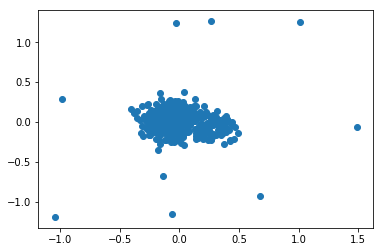

In [295]:
pyplot.scatter(result[:, 0], result[:, 1])

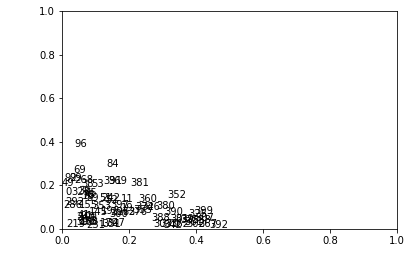

In [297]:
for i in range(400):
    pyplot.annotate(i, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [301]:
df = pd.DataFrame(X_tsne, index=[i for i in range(400)], columns=['x', 'y'])

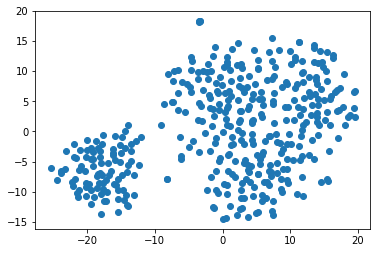

In [311]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

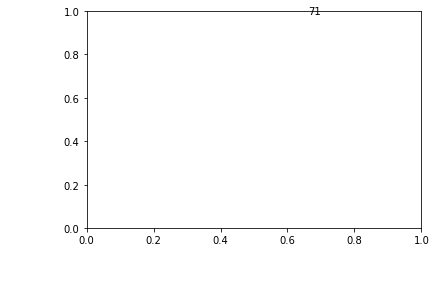

In [312]:
for word, pos in df.iterrows():
    plt.annotate(word, pos)

In [310]:
plt.show()

---------------

In [313]:
all_data = pd.read_csv('../../transe-linkprediction/Data/all_combination_data.csv')

In [321]:
def transe_results(model,fact):
    model.eval()
    i = fact['entity_a'].values
    j = fact['entity_b'].values
    r = fact['relation'].values
    #score = 100000
        #xt = [i,j,k]
    #i = np.array([[i]])
    #j = np.array([[j]])
    #k = np.array([[r]])
    pred_score = model.predict(i,j,r)
    return pred_score.data.numpy()

In [324]:
t = transe_results(hole,all_data)
all_data['score'] = t.tolist()
#all_data['prediction'] = 1*(t < args.THRESHOLD).tolist()

In [325]:
all_data = all_data.sample(frac=1).reset_index(drop=True)

In [334]:
all_data['features'] = ''

In [338]:
i = all_data['entity_a'].values
j = all_data['entity_b'].values
r = all_data['relation'].values
ent_h = hole.ent_embeddings(torch.LongTensor([i])).view(-1,15)
ent_t = hole.ent_embeddings(torch.LongTensor([j])).view(-1,15)
ent_r = hole.rel_embeddings(torch.LongTensor([r])).view(-1,15)
fea = np.concatenate((ent_h.data.numpy(),ent_t.data.numpy(),ent_r.data.numpy()),axis=1)

In [342]:
fea.shape

(638400, 45)

In [343]:
all_data['features'] = fea.tolist()

In [344]:
all_data.head()

,entity_a,entity_b,relation,true_pred,score,features
0,379,96,0,0,3.922153,"[0.119266174734, -0.149918422103, 0.1815470159..."
1,320,120,0,0,3.688225,"[0.0672423392534, -0.0162177849561, 0.21263808..."
2,355,85,3,0,4.587709,"[-0.0230575259775, -0.0991908609867, 0.0820712..."
3,200,237,0,0,6.247899,"[0.00707076583058, -0.195501089096, -0.1664875..."
4,302,384,3,0,4.259001,"[0.173287734389, -0.179076492786, 0.0494551956..."


In [373]:
all_data["score"] = all_data["score"].map(lambda x: [x])

In [374]:
all_data["fea_sc"] = all_data.features + all_data.score

In [377]:
from sklearn.model_selection import train_test_split 

In [378]:
all_train, all_valid_test = train_test_split(all_data,test_size =0.7, random_state =1,stratify = all_data['true_pred']) 

In [379]:
all_train.shape

(191520, 7)

In [380]:
all_valid,all_test = train_test_split(all_valid_test,test_size =0.7, random_state =1,stratify = all_valid_test['true_pred']) 

In [381]:
all_valid.shape

(134064, 7)

In [382]:
all_test.shape

(312816, 7)

In [385]:
clf = LogisticRegression(max_iter=500,random_state=40,solver='lbfgs',class_weight='balanced')
clf = clf.fit(np.array([all_train['fea_sc']]).reshape(all_train.shape[0],-1),all_train['true_pred'].values)

In [388]:
test_pred = clf.predict(np.array([all_test['fea_sc']]).reshape(all_test.shape[0],-1))

In [389]:
valid_pred = clf.predict(np.array([all_valid['fea_sc']]).reshape(all_valid.shape[0],-1))

In [391]:
test_acc = test_pred == all_test['true_pred'].values

In [397]:
(test_acc*1).sum()/float(all_test.shape[0])

0.8696262339522275

In [398]:
valid_acc = valid_pred == all_valid['true_pred'].values

In [399]:
(valid_acc*1).sum()/float(all_valid.shape[0])

0.869562298603652

In [400]:
k = clf.predict(np.array([all_data['fea_sc']]).reshape(all_data.shape[0],-1))

In [402]:
all_data['predictions'] = k.tolist()

In [403]:
all_data.head()

,entity_a,entity_b,relation,true_pred,score,features,fea_sc,predictions
0,379,96,0,0,[3.92215299606],"[0.119266174734, -0.149918422103, 0.1815470159...","[0.119266174734, -0.149918422103, 0.1815470159...",0
1,320,120,0,0,[3.68822479248],"[0.0672423392534, -0.0162177849561, 0.21263808...","[0.0672423392534, -0.0162177849561, 0.21263808...",0
2,355,85,3,0,[4.58770942688],"[-0.0230575259775, -0.0991908609867, 0.0820712...","[-0.0230575259775, -0.0991908609867, 0.0820712...",0
3,200,237,0,0,[6.24789857864],"[0.00707076583058, -0.195501089096, -0.1664875...","[0.00707076583058, -0.195501089096, -0.1664875...",0
4,302,384,3,0,[4.2590007782],"[0.173287734389, -0.179076492786, 0.0494551956...","[0.173287734389, -0.179076492786, 0.0494551956...",0


In [404]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [405]:
precision_score(all_data.true_pred,all_data.predictions)

0.00881015196915253

In [406]:
recall_score(all_data.true_pred,all_data.predictions)

0.8282828282828283

In [407]:
f1_score(all_data.true_pred,all_data.predictions)

0.017434855536393488

In [410]:
(all_data.true_pred ==all_data.predictions).sum()/float(all_data.shape[0])

0.869702380952381